<a href="https://colab.research.google.com/github/Navneet2409/cardiovascular-risk-prediction/blob/main/Cardiovascular_Notebook_Navneet_Keshri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    - Cardiovascular Risk Prediction**



##### **Project Type**    - Classification Algorithm
##### **Contribution**    - Individual


# **Project Summary -**

The objective of the project is to forecast the 10-year probability of future coronary heart disease (CHD) among patients residing in Framingham, Massachusetts. To achieve this, a dataset encompassing details about the patients' demographics, behaviors, and medical vulnerabilities has been employed as the foundation for constructing a predicting model. This model will harness the capabilities of machine learning methodologies to scrutinize the available data comprehensively, thereby facilitating precise prognostications of CHD risk. The primary aim of this initiative is to devise a tool that can facilitate the early identification and prevention of CHD, effectively tackling a substantial public health issue. The project's ultimate output will manifest as a predictive model, which healthcare providers can utilize to make well-informed choices concerning patient care strategies.

* There are approximately 3390 records and 16 attributes in the dataset.
* First, we start by importing the dataset and the necessary libraries to conducted exploratory data analysis (EDA).
* Outliers and null values are removed from the raw data and are treated appropriately. Data is then transformed to ensure that it's compatible with machine learning models.
* The target class imbalance is handled using SMOTE.
* Then finally cleaned and scaled data is sent to 8 various models, the metrics are used to evaluate the model, and hyperparameters tuning is done to make sure the right parameters are being passed to the model.
* During the process of constructing a machine learning model, it is commonly advised to monitor a variety of metrics. This is due to the fact that each metric illuminates unique facets of model efficacy. In our case, we are placing a greater emphasis on evaluating the Recall score and the F1 score.
* It is categorically unacceptable to miss identifying a particular patient or to classify a particular patient as healthy (false negative). That is why we have preferred recall score.

# **Index**

###**In this project, We will do**
1.   Problem Statement
2.   Getting Familiar with Data
3.   Understanding Your Variables
4.   EDA
5.   Data Cleaning
6.   Feature Engineering
7.   Model Building
8.   Model Implementation
9.   Conclusion

## **1. Problem Statement**

**What exactly are cardiovascular diseases?**

A cluster of conditions that impact the cardiovascular system, encompassing the heart and blood vessels, is referred to as cardiovascular diseases. This category encompasses heart disease, which specifically affects the blood vessels that supply the heart muscle. In the majority of cases, the root cause of sudden occurrences like heart attacks and strokes is a blockage hindering blood flow to the heart or brain. The primary factor leading to this is the accumulation of fatty deposits along the inner linings of the blood vessels that provide nourishment to the heart or brain.

The primary objective of this classification endeavor revolves around the anticipation of the forthcoming 10-year risk associated with coronary heart disease (CHD) among patients. Addressing the matter of coronary heart disease holds immense significance within the realm of public health, and the early prognostication of CHD risk assumes a pivotal role in facilitating preventive measures. The dataset utilized stems from an ongoing cardiovascular study encompassing residents of Flamingham, Massachusetts. Encompassing over 4000 entries and 15 attributes, each attribute signifies a potential risk element. These attributes span across demographic, behavioral, and medical dimensions.

**WHY DO WE NEED CARDIOVASCULAR RISK PREDICTION?**

1.  The greatest obstacle facing the medical industry is accurately predicting and diagnosing heart disease. Heart diseases are influenced by numerous factors.
2. Heart disease is even referred to as a "silent killer" because it kills people without showing any obvious symptoms.
3. When high-risk patients are diagnosed with heart disease early, it is easier to make lifestyle changes, which in turn lowers the risk of complications.
4. Based on the way people currently live, machine learning can help predict the likelihood of heart disease in the coming years.

## **2. Getting Familiar with Data**

### Import Libraries

In [1]:
# Import Libraries and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Impoting data preprocessing libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Importing model selection libraries.
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Importing metrics for model evaluation.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve



In [2]:
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Importing machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Importing SMOTE for handling class imbalance.
#from imblearn.over_sampling import SMOTE

# Importing warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# load the CARDIOVASCULAR RISK DATA from the drive
risk_df = pd.read_csv('https://raw.githubusercontent.com/Samagra06/ML/main/data_cardiovascular_risk.csv', index_col='id')

### Dataset First View

In [4]:
# Viewing the top 5 rows to take a glimpse of the data
risk_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
# Viewing the last 5 rows
risk_df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


### Dataset Rows & Columns Count

In [6]:
# Dataset Rows & Columns
risk_df.shape

(3390, 16)

In [7]:
print(f'number of rows : {risk_df.shape[0]}  \nnumber of columns : {risk_df.shape[1]}')

number of rows : 3390  
number of columns : 16


### Dataset Information

In [8]:
# Dataset Info
risk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


### Duplicate Values

**Why is it important to get rid of duplicate records in my data?**

The term "duplication" pertains to the mere existence of replicated information within the dataset. This situation might arise due to erroneous data input or the methodologies employed for data collection. We have the opportunity to enhance efficiency and economize resources by eliminating duplicated data entries from our dataset. This action ensures that the machine learning model isn't presented with identical data multiple times, leading to a reduction in both time and costs.

In [9]:
# Checking Duplicate Values
value = len(risk_df[risk_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


There are no duplicate data entries in the above data.

### Missing Values/Null Values

**Why dealing with missing values is necessary?**

There are frequently a lot of missing values in the actual data. Corrupted or missing data may result in missing values. Since many machine-learning algorithms do not support missing values, missing data must be handled during the dataset's pre-processing. Therefore, we begin by looking for values that are missing.

In [10]:
# Missing Values/Null Values Count
print(risk_df.isnull().sum())

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


We can see there are null values present in totChol, BMI, glucose, BPMeds, cigsPerDay, education has some null values and heartRate has 1 null value.

In [11]:
# Missing Values Percentage
round(risk_df.isna().sum()/len(risk_df)*100, 2)

age                0.00
education          2.57
sex                0.00
is_smoking         0.00
cigsPerDay         0.65
BPMeds             1.30
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            1.12
sysBP              0.00
diaBP              0.00
BMI                0.41
heartRate          0.03
glucose            8.97
TenYearCHD         0.00
dtype: float64

<Axes: >

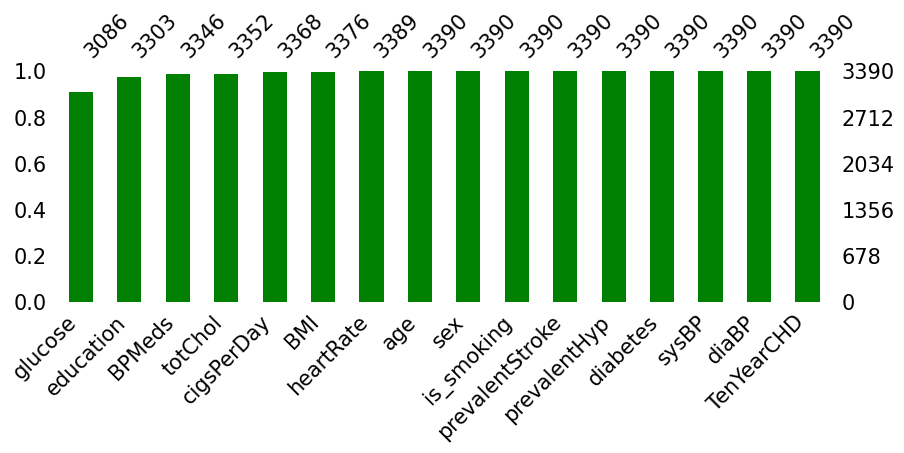

In [12]:
# Visualizing the missing values
import missingno as msno
msno.bar(risk_df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

<Axes: ylabel='id'>

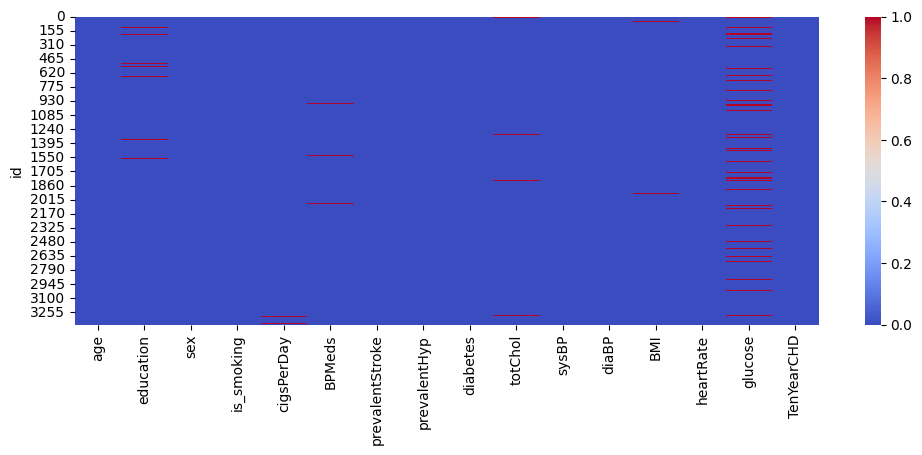

In [13]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(12,4))
sns.heatmap(risk_df.isna(), cmap = 'coolwarm')

### What did you know about your dataset?

The data comes from an ongoing cardiovascular study of Framingham, Massachusetts, residents. The purpose of the classification is to determine whether the patient is at risk for coronary heart disease (CHD) in the ten years to come. The data about the patients is provided by the dataset. It incorporates more than 4,000 records and 15 ascribes.

A classification algorithm is a method of supervised learning that divides data into various classes by utilizing data training. Data or observations are used to train classification predictive modeling, and new observations are categorized into classes or groups.

* There are 3390 rows and 16 columns in the dataset. In the 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose', there are missing values. The dataset does not contain any duplicate values.

* A potential risk factor exists for each attribute. Demographic, behavioral, and medical risk factors are these characteristics.

* First, we should try to understand the dataset through EDA, and then we can deal with null values later.

## **3. Understanding Your Variables**

###  Columns

In [14]:
# Dataset Columns
risk_df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

###  Statistical Summary

In [15]:
# Dataset Describe    (used to get statistics of numerical columns)
risk_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0
diaBP,3390.0,82.883038,12.023581,48.00,74.50,82.00,90.00,142.5


As can be seen in the statistical summary, there is skewness and outliers present in the continuous features 'cigsperday', 'totchol', 'sysbp', 'diebp', 'BMI', 'heartrate', and 'glucose' because there is such a large difference between the 75% percentile value and the maximum value.

###  Variables Description

Demographic
* **age  :** Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
* **education :** level of education from 1 to 4 (Ordinal Variable)
* **sex :** male or female ("M" or "F")

Behavioral

* **is_smoking :** whether or not the patient is a current smoker ("YES" or "NO")
* **cigsPerDay :** the number of cigarettes that the person smoked on average in one day (can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

* **BPMeds :** whether or not the patient was on blood pressure medication (Nominal)
* **prevalentStroke :** whether or not the patient had previously had a stroke (Nominal)
* **prevalentHyp :** whether or not the patient was hypertensive (Nominal)
* **diabetes :** whether or not the patient had diabetes (Nominal)

Medical(current)

* **totChol :** total cholesterol level (Continuous)
* **sysBP :** systolic blood pressure (Continuous)
* **diaBP :** diastolic blood pressure (Continuous)
* **BMI :** Body Mass Index (Continuous)
* **heartRate :** heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* **glucose :** glucose level (Continuous)

Predict variable (desired target)
* **TenYearCHD :** (binary: “1”, means “Yes”, “0” means “No”)

### Unique Values

In [16]:
# Check Unique Values for each variable.
for i in risk_df.columns.tolist():
  print("No. of unique values in",i,"is",risk_df[i].nunique())

No. of unique values in age is 39
No. of unique values in education is 4
No. of unique values in sex is 2
No. of unique values in is_smoking is 2
No. of unique values in cigsPerDay is 32
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in totChol is 240
No. of unique values in sysBP is 226
No. of unique values in diaBP is 142
No. of unique values in BMI is 1259
No. of unique values in heartRate is 68
No. of unique values in glucose is 132
No. of unique values in TenYearCHD is 2


## **4. EDA**

#### **What is EDA?**
* EDA stands for "Exploratory Data Analysis." It is a crucial initial step in the process of machine learning and data analysis. EDA involves investigating and summarizing the main characteristics, patterns, and relationships within a dataset. The primary goal of EDA is to gain insights into the data, identify potential patterns or anomalies, and inform subsequent steps in the data preprocessing, feature engineering, and model building processes.


#### **4.1 Numeric and Categorical features**

In [17]:
numeric_features = []
categorical_features = []

# splitting features into numeric and categoric.
'''
If feature has more than 10 categories we will consider it
as numerical_features, remaining features will be added to categorical_features.
'''
for col in risk_df.columns:
  if risk_df[col].nunique() > 10:
    numeric_features.append(col)
  else:
    categorical_features.append(col)

print(f'numeric feature : {numeric_features}')
print(f'category feature : {categorical_features}')

numeric feature : ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
category feature : ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


**Observation:**

* In our case, most of the categorical features are of the binary type, so the values are 0 and 1 (with a few exceptions). In terms of the numerical features, each one has a unique set of continuous and range values.

#### **4.2 Univariate Analysis**

##### **4.2.1 Data Distribution of Numeric features**

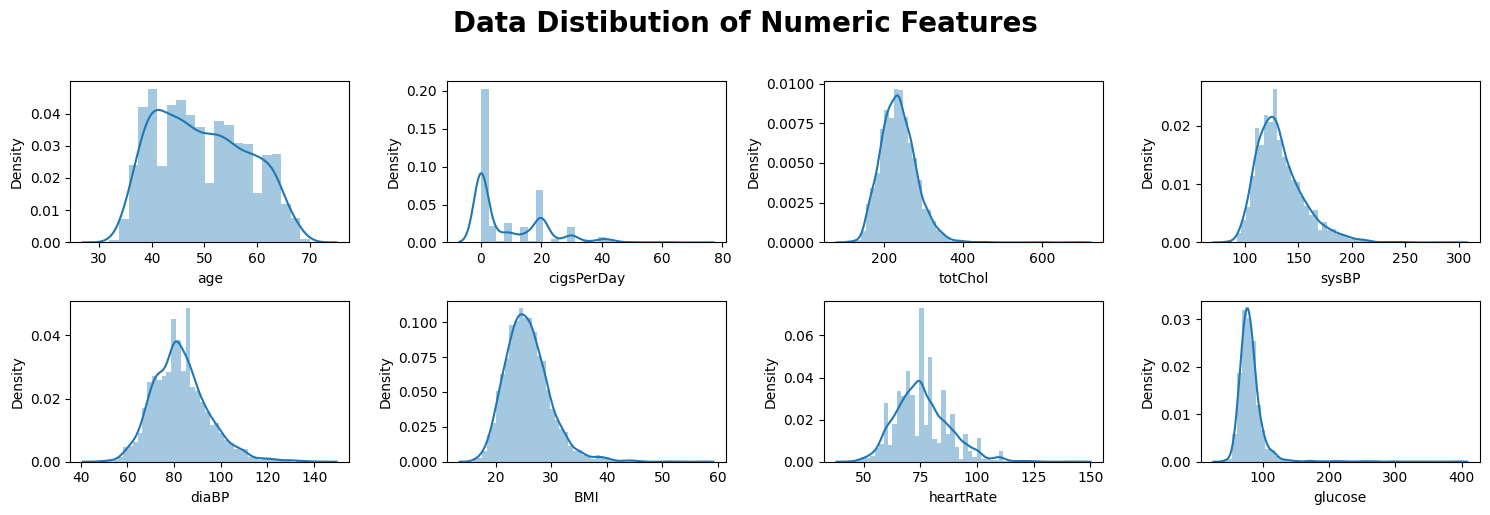

In [18]:
# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Data Distibution of Numeric Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)                       # subplots 2 rows, 4 columns

  # dist plots
  sns.distplot(risk_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

**Observation:**

* For numerical features, we can see that the majority of distributions are right-skewed. The distributions of totChol (total cholesterol) and BMI are roughly comparable. The distribution of glucose is highly skewed to the right. It demonstrates that glucose has many outliers.

##### **4.2.2 Outlier Analysis of Numeric features**

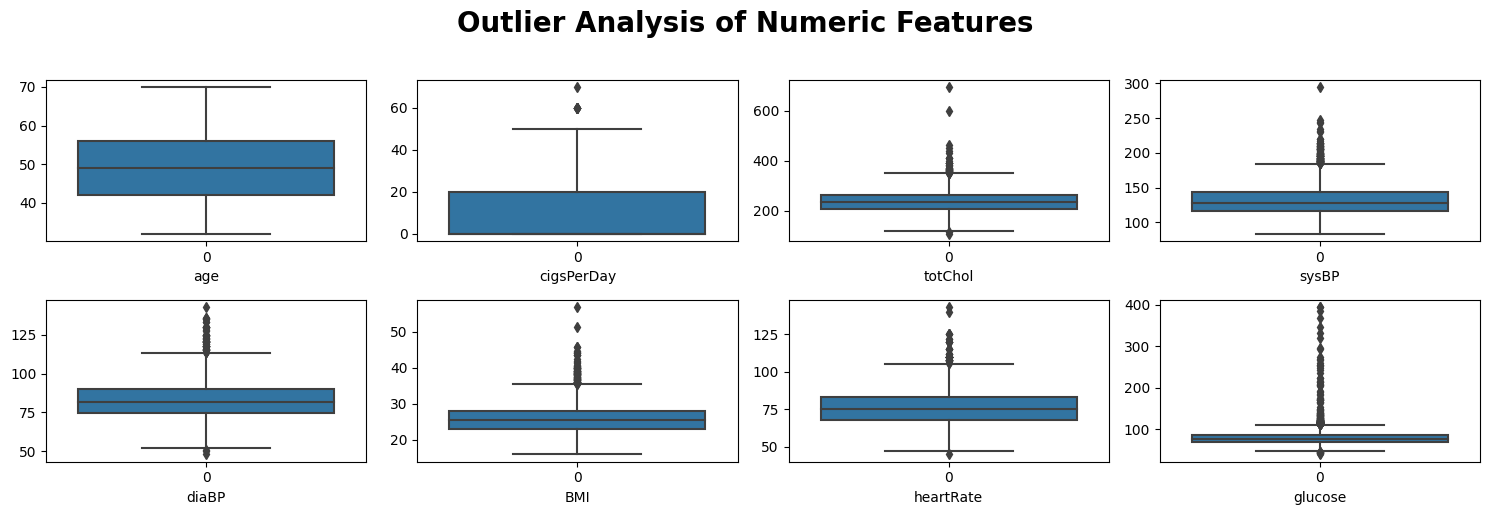

In [19]:
# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Outlier Analysis of Numeric Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)                       # subplots 2 rows, 4 columns

  # boxplots
  sns.boxplot(risk_df[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

**Observation:**
* Outliers are visible in the 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', and 'glucose' columns.

##### **4.2.3 Univariate Analysis of Categorical Features**

In [78]:
# figsize
#plt.figure(figsize=(15,5))
# title
#plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', y=1.02)

#for i,col in enumerate(categorical_features):
  #plt.subplot(2, 4, i+1)            # subplot of 2 rows and 4 columns

  # countplot
  #sns.countplot(risk_df[col])
  # x-axis label
  #plt.xlabel(col)
  #plt.tight_layout()

**Observations:**
* In the 'education' column majority of the count falls under category 1, with fewer falling under category 4.
* When compared to male patients, female patients are greater in numbers.
* The proportion of non-smokers and smokers is nearly identical.
* Majority of patients do not take blood pressure medication.
* Fewer patients had suffered a stroke previously.
* Lower proportion of patients had hypertension in the past.
* Diabetes was present in fewer patients.
* Lower number of patients had a risk of coronary heart disease (CHD) over 10 years. (target variable - Imbalance data)

#### **4.3 Bivariate and Multivariate Analysis**

##### **4.3.1 Scatter plot between target varible wrt to age and heartRate**

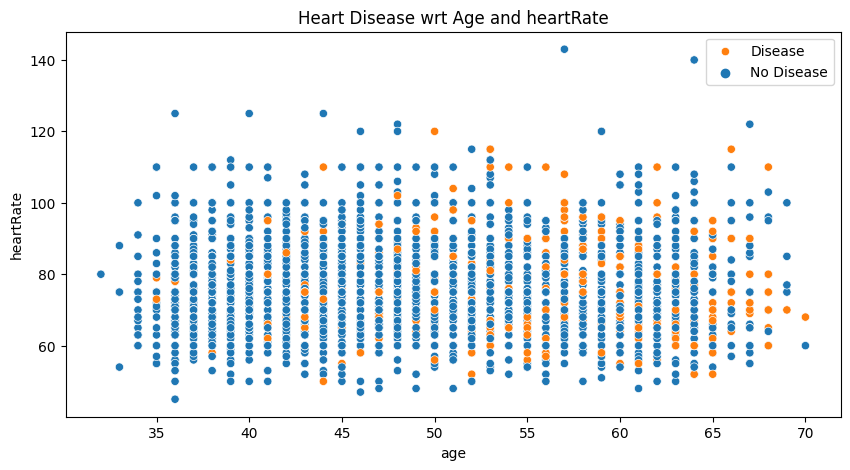

In [21]:
# plotting graph to analyze age with respect to heartrate which are having Disease or No Disease

# figsize
plt.figure(figsize=(10,5))
# scatterplot
sns.scatterplot(x='age', y='heartRate', hue='TenYearCHD', data=risk_df)
# title
plt.title('Heart Disease wrt Age and heartRate')
plt.legend(['Disease', 'No Disease'])

**Observation:**
* This is a multi variate analysis between age, TenYearCHD and heartRate.
* There is a clear relation between age and Heart Disease, with the increase in age the chance of heart disease increases. There is no significant relationship between heart disease and heart rate

##### **4.3.2 Regression plot between target variable and numerical features**

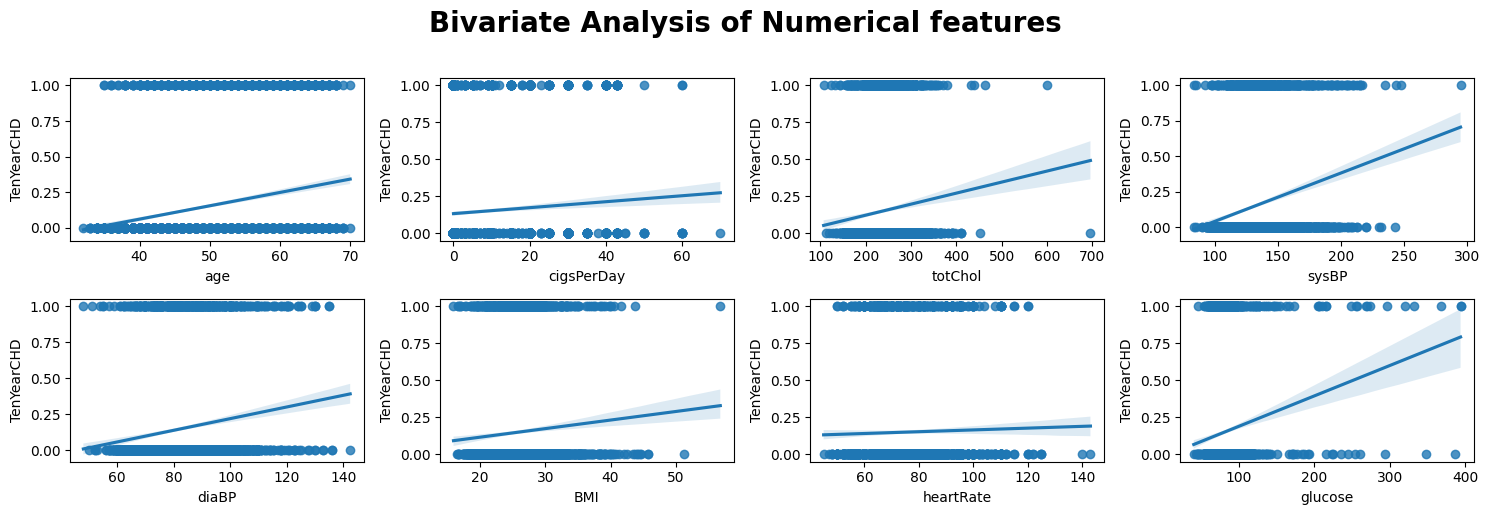

In [22]:
# Checking Linearity of all numerical features with our target variable

# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Bivariate Analysis of Numerical features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)                     # subplots of 2 rows and 4 columns

  # regression plots
  sns.regplot(x=risk_df[col], y='TenYearCHD', data=risk_df)
  # x-axis lable
  plt.xlabel(col)
  plt.tight_layout()

**Observation:**
* Numerous Independent numerical variables are linked to our Target variable and have a positive relationship with our target variable.

##### **4.3.3 Bivariate Analysis of Categorical Features**

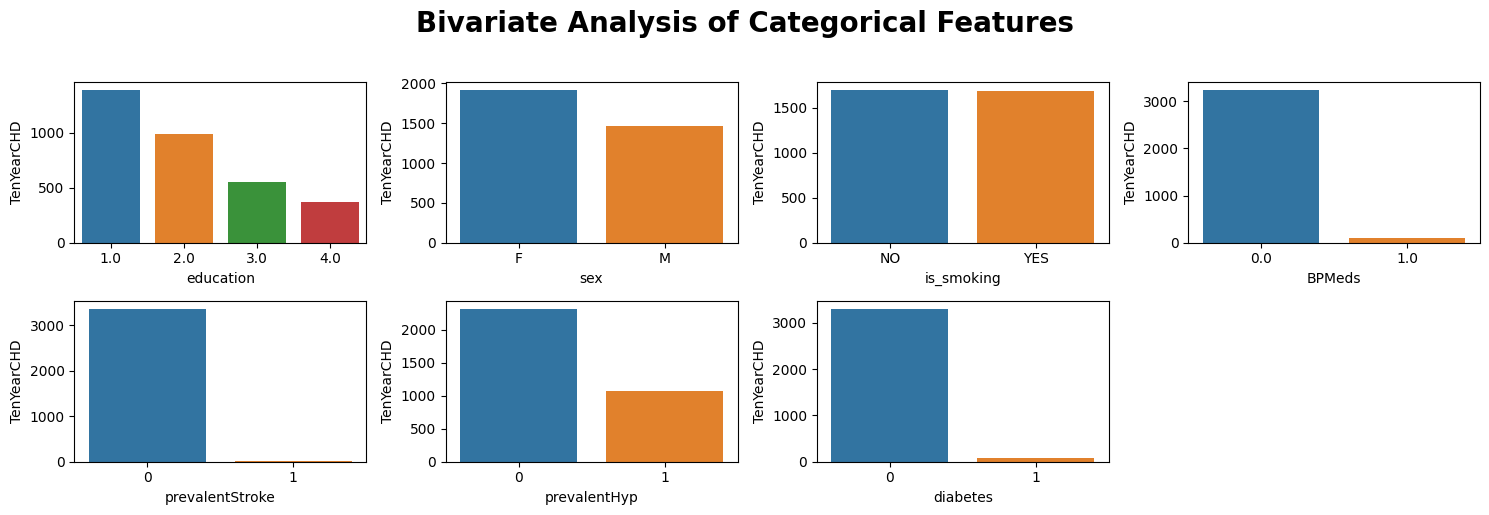

In [23]:
# Counting number of category present in each feature with respect to target feature

# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Bivariate Analysis of Categorical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(categorical_features[:-1]):       # taking all features in categoric column except target feature(TenYearCHD)
  plt.subplot(2, 4, i+1)                                 # subplots of 2 rows and 4 columns
  a = risk_df.groupby(col)[['TenYearCHD']].count().reset_index()

  # barplot
  sns.barplot(x=a[col], y=a['TenYearCHD'])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

## **5. Data Cleaning**

#### **What is data cleaning?**
* Data cleaning is the process of identifying and correcting or removing inaccuracies, inconsistencies, and missing values in a dataset. It is an important step in the data preparation process that ensures that the data is accurate, complete, and in a format that can be easily analyzed. Data cleaning may include tasks such as removing duplicate records, filling in missing values, correcting errors, and standardizing data formats. The goal of data cleaning is to improve the quality of the data and make it suitable for further analysis and modeling.

### **5.1 Duplicate Values**

In [24]:
# counting duplicate values
risk_df.duplicated().sum()

0

There is no duplicate record in the dataset

### **5.2 Missing Values**

In [25]:
# Missing Values/Null Values Count
print(risk_df.isnull().sum())

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


<Axes: >

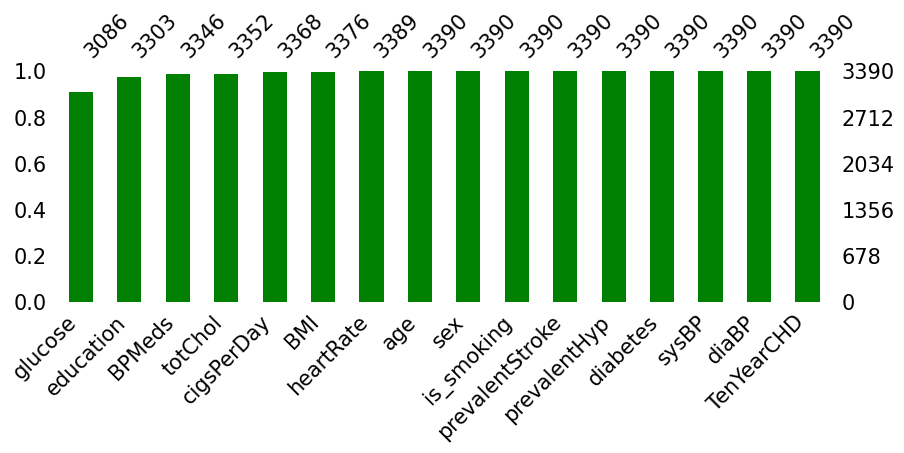

In [26]:
# Visualizing the missing values
import missingno as msno
msno.bar(risk_df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

* Null values are present in the 'glucose', 'education', 'BPMeds', 'totChols', 'cigsPerDay, 'BMI' and 'heartRate' columns.

In [27]:
# Missing Values Percentage
round(risk_df.isna().sum()/len(risk_df)*100, 2)

age                0.00
education          2.57
sex                0.00
is_smoking         0.00
cigsPerDay         0.65
BPMeds             1.30
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            1.12
sysBP              0.00
diaBP              0.00
BMI                0.41
heartRate          0.03
glucose            8.97
TenYearCHD         0.00
dtype: float64

In [28]:
# checking the shape of the data before missing value treatment
risk_df.shape

(3390, 16)

**Handling Missing Values**
* Typically, we use other records to replace these null values. However, the entries in this dataset are person-specific. The values vary from person to person, and the dataset is related to the medical field in this particular instance. Consequently, removing rows with any null value is the most logical choice we have for dealing with such values.

* We cannot take any risks with this prediction, so if we attempt to impute null values using advanced methods, it may affect the outcome because the values will be incorrect.

* **In the healthcare industry, every piece of data is crucial. Because of this, we came up with a solution by setting a threshold value. If a feature has less than 5% null values, we decide to drop those rows, and the remaining rows are imputing, which will affect prediction but not significantly.**

In [29]:
# features which has less than 5%  null values present.
nan_columns = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']

# dropping null values
risk_df.dropna(subset=nan_columns, inplace=True)

In [30]:
# glucose level are continuous in nature.
# Outlier are not treating yet thats why imputimg NaN values with median value.

risk_df['glucose'] = risk_df.glucose.fillna(risk_df.glucose.median())

In [31]:
# checking for null values after treating them.
risk_df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [32]:
# checking the shape of the data after missing values treatment
risk_df.shape

(3189, 16)

### **5.3 Skewness**

In [33]:
# statistical summary
risk_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3189.0,49.423957,8.556235,32.00,42.00,49.00,56.00,70.0
education,3189.0,1.972719,1.018435,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3189.0,9.098150,11.864621,0.00,0.00,0.00,20.00,70.0
BPMeds,3189.0,0.029476,0.169164,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3189.0,0.005958,0.076970,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3189.0,0.313264,0.463894,0.00,0.00,0.00,1.00,1.0
diabetes,3189.0,0.025400,0.157361,0.00,0.00,0.00,0.00,1.0
totChol,3189.0,236.968642,44.537998,113.00,206.00,234.00,264.00,600.0
sysBP,3189.0,132.436344,22.176848,83.50,117.00,128.00,143.50,295.0
diaBP,3189.0,82.841173,11.993650,48.00,74.50,82.00,89.50,142.5


As can be seen in the statistical summary for numerical features, there is a significant difference between the 75% percentile and maximum value, indicating that the dataset contains skewness and outliers.

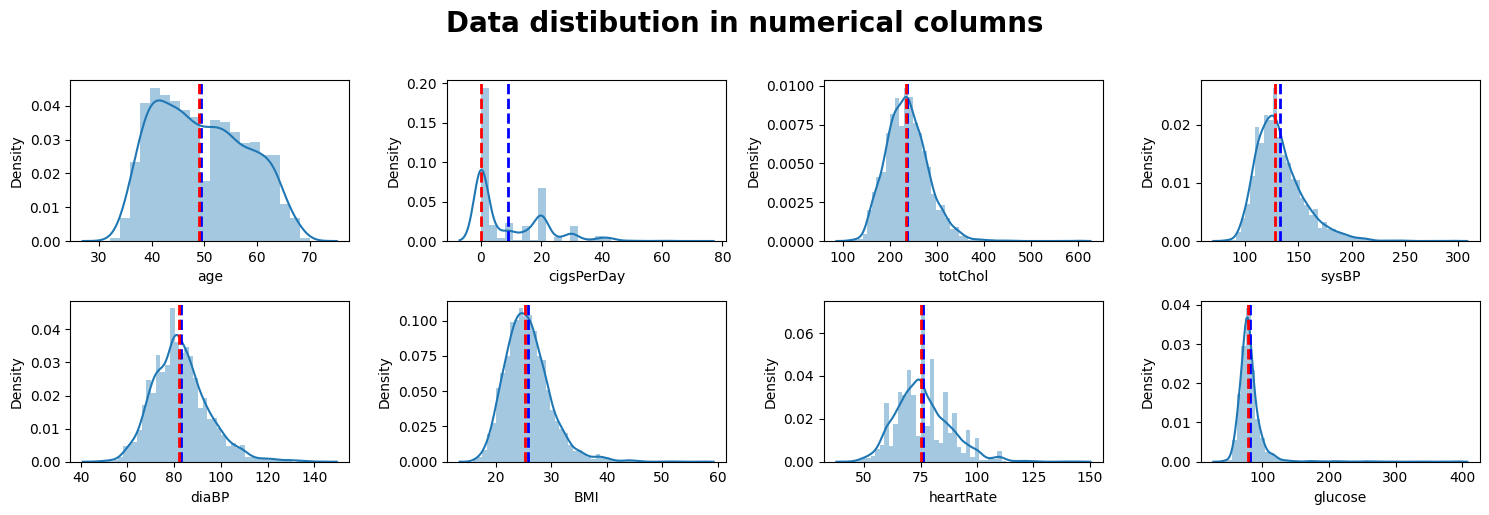

In [34]:
# figsize
plt.figure(figsize=(15,5))
# title
plt.suptitle('Data distibution in numerical columns', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)                      # subplots of 2 rows and 4 columns

  # distplot
  sns.distplot(risk_df[col])
  # mean line
  plt.axvline(risk_df[col].mean(), color='blue', linestyle='dashed', linewidth=2)
  # median line
  plt.axvline(risk_df[col].median(), color='red', linestyle='dashed', linewidth=2)
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

**Observation:**
* For numerical features, we can see that the majority of distributions are right-skewed. The distributions of totChol (total cholesterol) and BMI are roughly comparable. The distribution of glucose is highly skewed to the right. It demonstrates that glucose has many outliers.

* Some of the variables can get a normal distribution when outliers are removed. As a result, it appears that outliers should be removed before the transformation. First, we get rid of outliers, and then we check to see if we need to use the transformation technique again.

### **5.4 Treating Outliers**

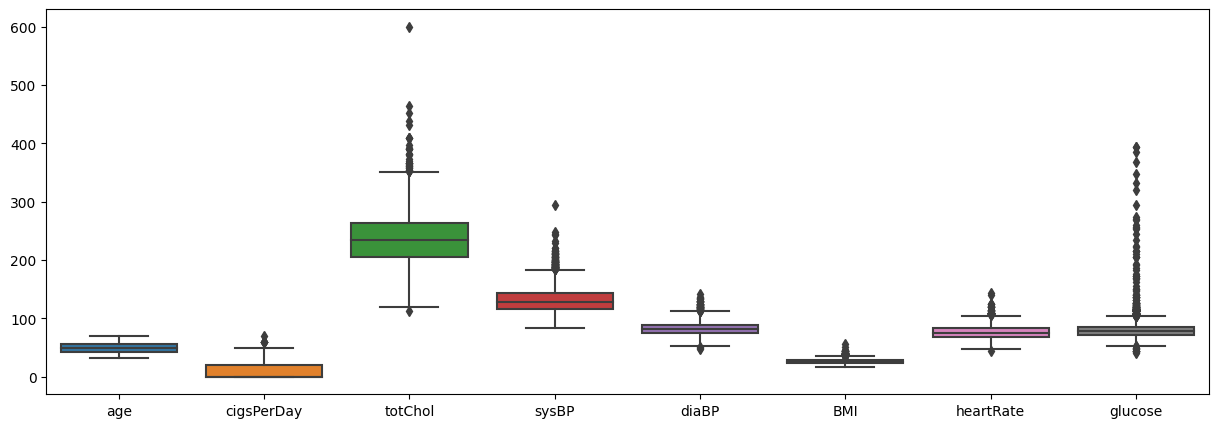

In [35]:
# figsize
plt.figure(figsize=(15,5))
# boxplot of numerical features
sns.boxplot(data=risk_df[numeric_features])
plt.show()

* Since we have limited datapoint hence we are not simply removing the outlier instead of that we are using the clipping method.

**Clipping Method:** In this method, we set a cap on our outliers data, which means that if a value is higher than or lower than a certain threshold, all values will be considered outliers. This method replaces values that fall outside of a specified range with either the minimum or maximum value within that range.

In [36]:
# we are going to replace the datapoints with upper and lower bound of all the outliers

def clip_outliers(risk_df):
    for col in risk_df[numeric_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = risk_df[col].quantile(0.25)
        q3 = risk_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # replacing the outliers with upper and lower bound
        risk_df[col] = risk_df[col].clip(lower_bound, upper_bound)
    return risk_df

In [37]:
# using the function to treat outliers
risk_df = clip_outliers(risk_df)

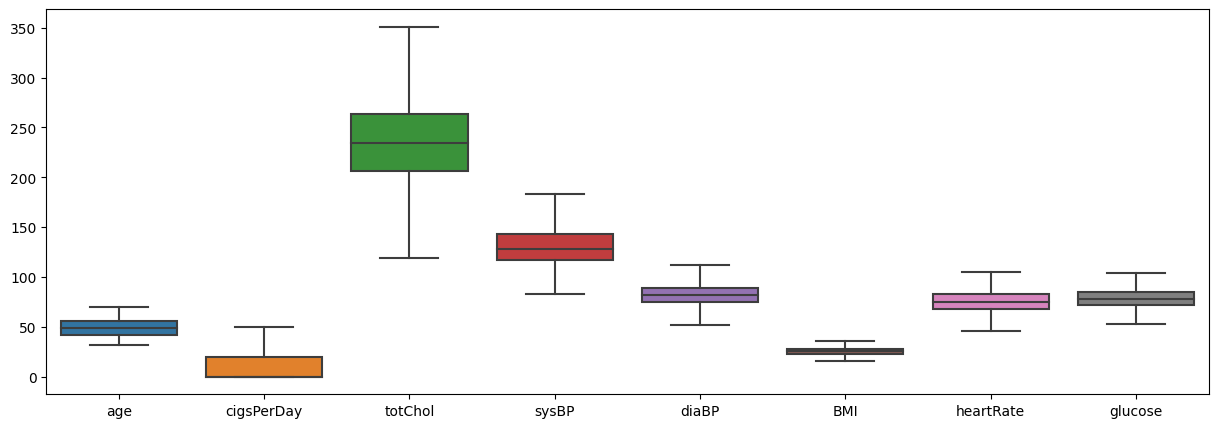

In [38]:
# checking the boxplot after outlier treatment

# figsize
plt.figure(figsize=(15,5))
# boxplot of numerical features
sns.boxplot(data=risk_df[numeric_features])
plt.show()

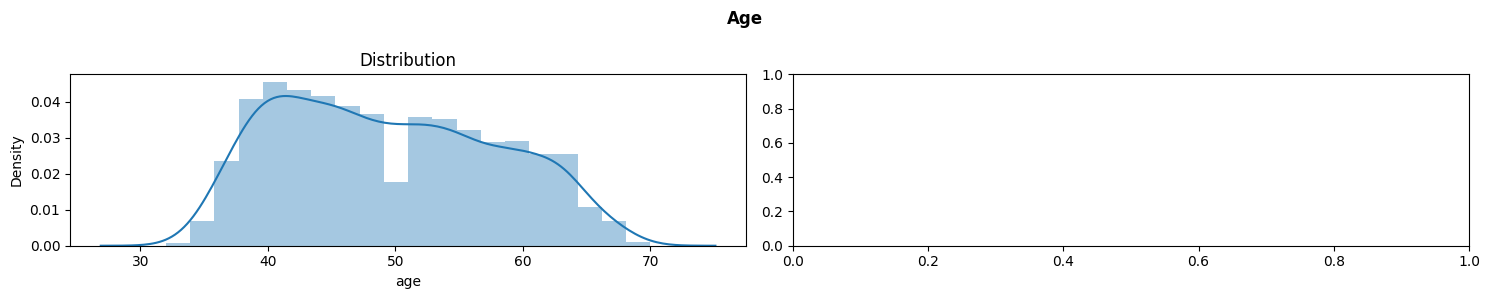

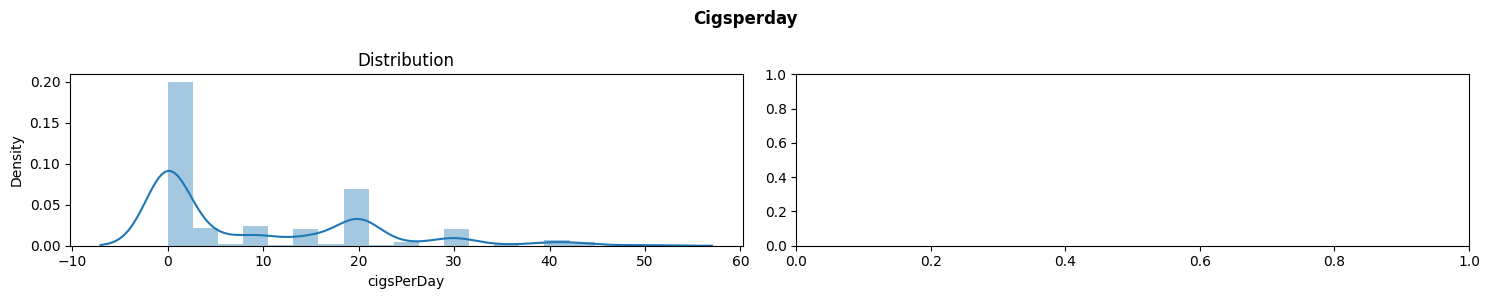

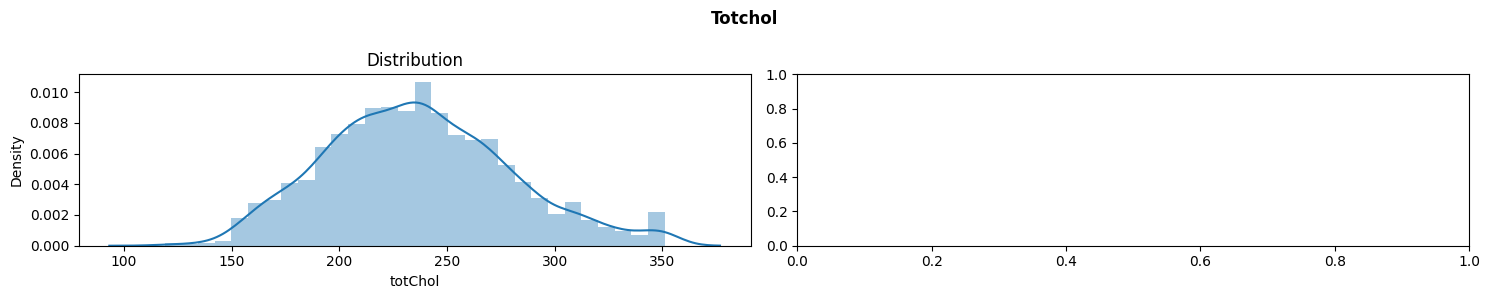

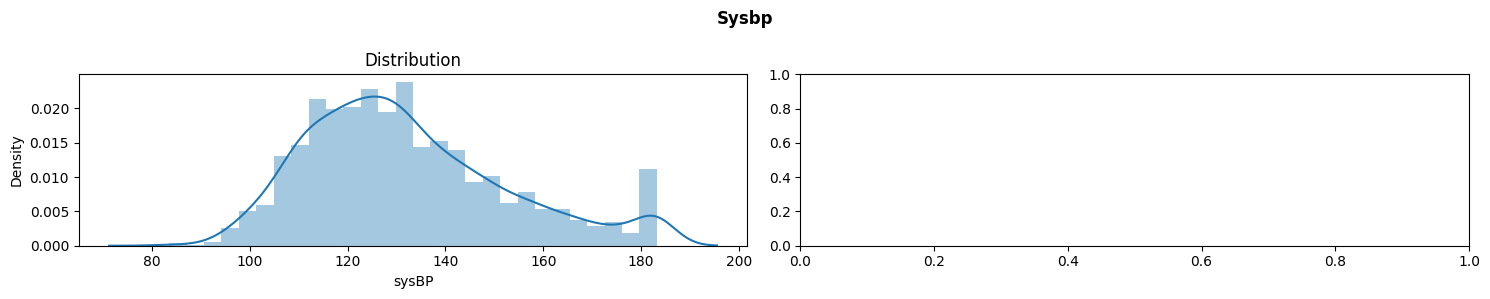

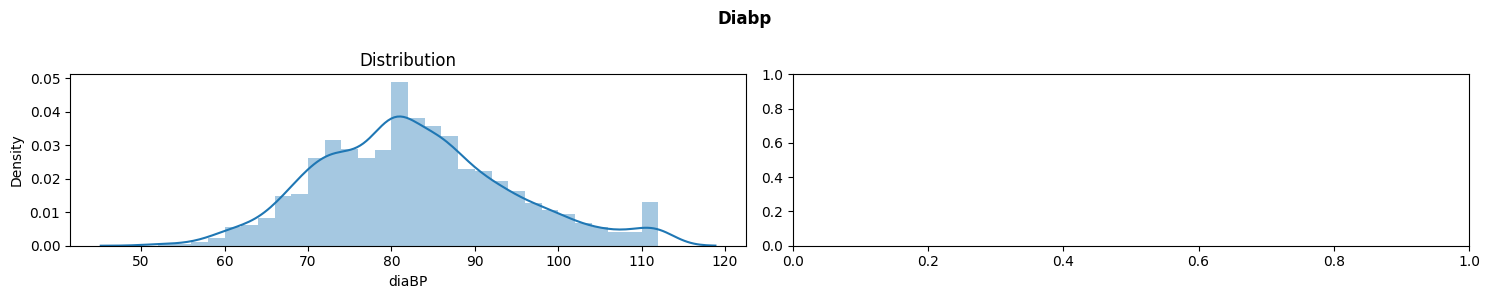

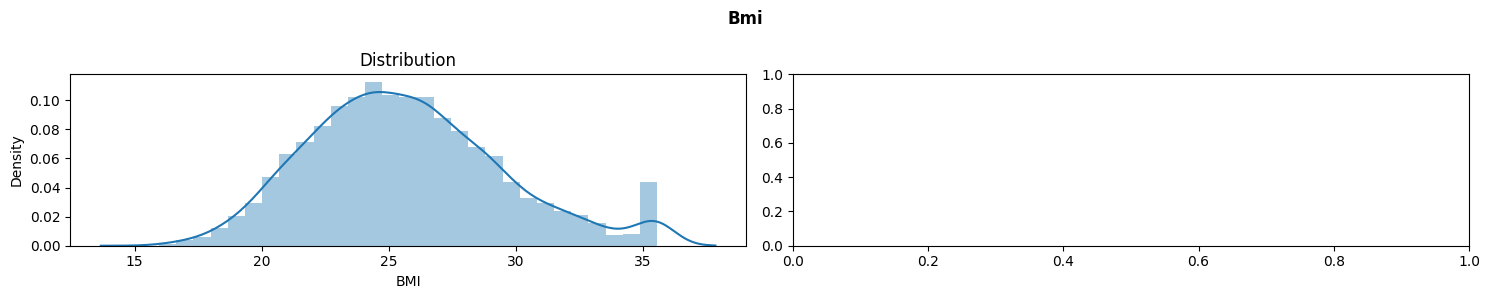

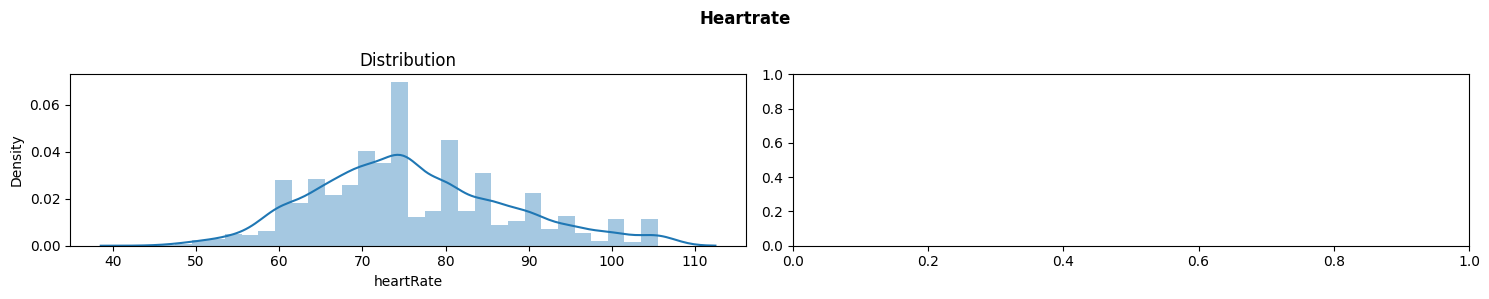

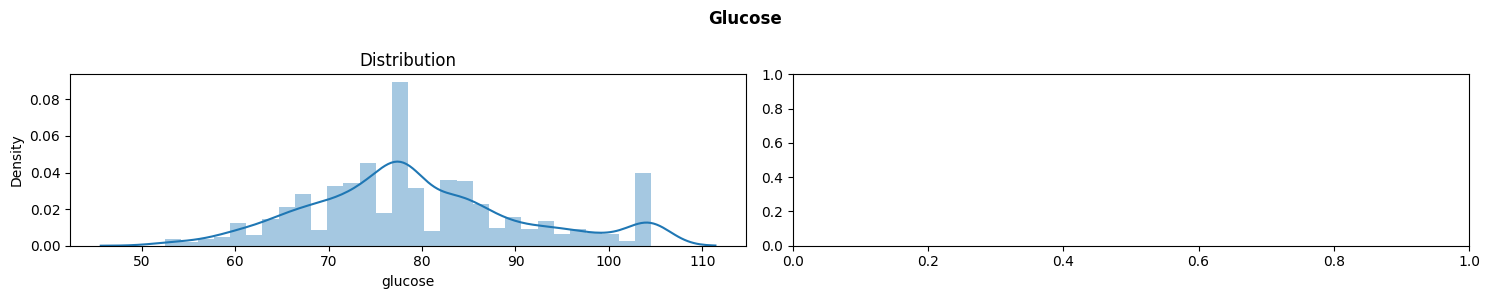

In [39]:
# checking for distribution after treating outliers.
for col in numeric_features:
  fig, ax =plt.subplots(1,2, figsize=(15,3))
  sns.distplot(risk_df[col], ax=ax[0]).set(title="Distribution")
 # sns.boxplot(risk_df[col], ax=ax[1]).set(title="Outlier")
  plt.suptitle(f'{col.title()}',weight='bold')
  plt.tight_layout()

* **We can also observe some shifts in the distribution of the data after treating outliers. Some of the data were skewed before handling outliers, but after doing so, the features almost follow the normal distribution. Therefore, we are not utilizing the numerical feature transformation technique.**

## **6. Feature Engineering**

* Feature engineering is the process of creating new features from existing ones to improve the performance of a machine learning model. This involves transforming raw data into a more useful and informative form, by either creating new features from the existing data, or selecting only the most relevant features from the raw data.
* The goal of feature engineering is to extract relevant information from the raw data and represent it in a way that can be easily understood by the machine learning model. The success of a machine learning model depends heavily on the quality of the features used as inputs, so feature engineering plays an important role in model performance.

### **6.1 Encoding**

Encoding is a technique in feature engineering that is used to convert categorical variables into numerical values that can be used by machine learning algorithms.

There are several encoding techniques, including:

* One-hot encoding: creates a binary column for each unique category, with a value of 1 indicating the presence of the category and 0 indicating the absence.
* Label encoding: assigns a unique integer value to each category.
* Ordinal encoding: assigns an ordered integer value to each category based on the natural ordering of the categories.
* Count encoding: replaces a categorical value with the number of times it appears in the dataset.

**Except for the 'sex' and 'is_smoking' columns, almost all of the categories in the dataset are already represented numerically (ordinal). Therefore, we are encoding these two columns.**

In [40]:
# Label Encoding

risk_df['sex'] = risk_df['sex'].map({'M':1, 'F':0})
risk_df['is_smoking'] = risk_df['is_smoking'].map({'YES':1, 'NO':0})

#####Checking if one hot encoding is required in any feature or not

#####**Every categorical feature except 'education' is binary and already encoded with 1 and 0 values hence we do not need to use One Hot Encoding for any column but we can use One Hot Encoding for education.**

**We're using an algorithm that treats the categorical variables as unordered, such as decision trees or random forests, hence one-hot encoding can be more effective in representing the categorical variables.**

In [41]:
# Check Unique Values for each categorical variable.
for i in categorical_features:
  print("No. of unique values in",i,"is",risk_df[i].nunique())

No. of unique values in education is 4
No. of unique values in sex is 2
No. of unique values in is_smoking is 2
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in TenYearCHD is 2


In [42]:
# dropping our target variable from categorical features list
categorical_features.pop(-1)

'TenYearCHD'

In [43]:
# check the datatypes of each column in the DataFrame
risk_df.dtypes

age                  int64
education          float64
sex                  int64
is_smoking           int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [44]:
# Cast values in the categorical columns as type str.
risk_df[categorical_features] = risk_df[categorical_features].astype(str)

# checking the result
risk_df.dtypes

age                  int64
education           object
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds              object
prevalentStroke     object
prevalentHyp        object
diabetes            object
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [45]:
# one-hot encode the 'education' feature
education_onehot = pd.get_dummies(risk_df['education'], prefix='education')

# drop the original education feature
risk_df.drop('education', axis=1, inplace=True)

# concatenate the one-hot encoded education feature with the rest of the data
risk_df = pd.concat([risk_df, education_onehot], axis=1)
risk_df.head(3)

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0
id,,,,,,,,,,,,,,,,,,,
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,0,0,1
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,0,0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,1,0,0,0


### **6.2 Feature Selection**

Feature selection is a technique in machine learning where you select a subset of the most important features from a larger set of features to use as inputs for a model. The goal of feature selection is to reduce the number of features used in the model, while retaining the most important and relevant information from the data.

#### **6.2.1 Correlation Coefficient and Heatmap**

* The correlation coefficient is a numerical measure of the strength and direction of a linear relationship between two variables. In other words, it measures the extent to which changes in one variable are associated with changes in the other variable. The correlation coefficient ranges from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

* The correlation coefficient is an important tool in data analysis and machine learning, as it can help to identify relationships between variables and can be used in feature selection techniques to remove highly correlated features, which can reduce overfitting and improve the performance of the model.

<Axes: >

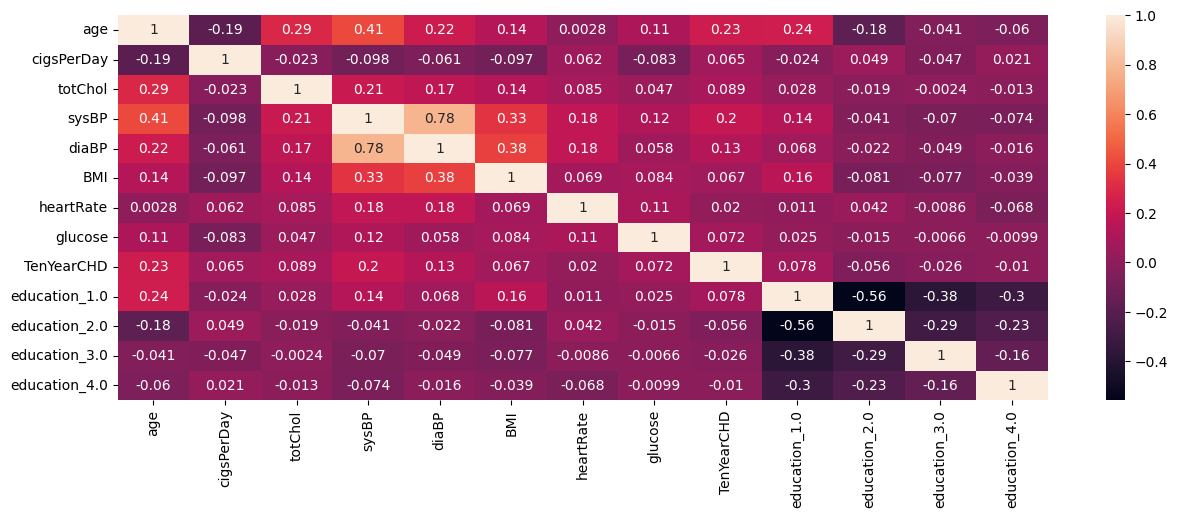

In [46]:
# Plotting correlation heatmap
plt.figure(figsize=(15,5))
sns.heatmap(risk_df.corr(), annot=True)

In [47]:
# find and remove correlated features

def correlation(dataset, threshold):
    col_corr = set()                                           # Set of all the names of correlated features
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:        # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]               # getting the name of column
                col_corr.add(colname)
    return col_corr

In [48]:
# checking the highly correlated features
correlation(risk_df, 0.7)          # setting threshold of 0.7

{'diaBP'}

#### **6.2.2 Feature Manipulation**

##### **The readings of blood pressure are shown in two numbers.**
* The highest number in your systolic blood pressure reading.
* The lowest number on your diastolic blood pressure readings.

Pulse Pressure is the sum of the top number (systolic) and the bottom number (diastolic). For instance, a pulse pressure of 40 is considered to be healthy if the resting blood pressure is 120/80 millimeters of mercury (mm Hg). A pulse pressure greater than 40 mm Hg is typically considered unhealthy.

The risk of a heart event, such as a heart attack or stroke, can be predicted by measuring pulse pressure. High pulse pressure, especially in older people, is considered a risk factor for cardiovascular disease.

In [49]:
# adding new column PulsePressure
risk_df['pulse_pressure'] = risk_df['sysBP'] - risk_df['diaBP']

# dropping the sysBP and diaBP columns
risk_df.drop(columns=['sysBP', 'diaBP'], inplace=True)

#####If a person smokes (is_smoking=='yes'), but the number of cigarettes smoked per day is 0, or cigsPerDay is 0. Then it may develop into a conflicting case, we must treat those records.

In [50]:
# checking data, weather the provide information is correct or not
risk_df[(risk_df.is_smoking == 'YES') & (risk_df.cigsPerDay == 0)]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,pulse_pressure
id,,,,,,,,,,,,,,,,,,


since the is_smoking and cigsPerDay columns do not contain any conflict cases. It is sufficient to provide information regarding is_smoking in the cigsPerDay column.

In [51]:
# droping is_smoking column due to multi-collinearity

risk_df.drop('is_smoking', axis=1, inplace=True)

### **6.3 Extra Trees Classifier**

Extra_Tree_Classifier is a tree-based strategy that naturally ranks according to how well they decrease the Gini impurity (the purity of the node) across all trees. Notes with the least amount of impurity are found at the ends of trees, while nodes at the beginning of trees have the greatest decrease in impurity. As a result, we can select a subset of the most important features by pruning trees below a particular node.

In [52]:
X = risk_df.drop('TenYearCHD', axis=1)
y= risk_df['TenYearCHD']

In [53]:
# importing libarary
from sklearn.ensemble import ExtraTreesClassifier

# model fitting
model = ExtraTreesClassifier()
model.fit(X,y)

# ranking feature based on importance
ranked_features = pd.Series(model.feature_importances_,index=X.columns)
print(ranked_features.sort_values(ascending=False))

age                0.146555
pulse_pressure     0.139301
BMI                0.126700
totChol            0.125821
glucose            0.123994
heartRate          0.119145
cigsPerDay         0.088838
prevalentHyp       0.025084
sex                0.022280
education_1.0      0.015493
education_2.0      0.013875
education_3.0      0.013303
education_4.0      0.011850
diabetes           0.011351
BPMeds             0.010500
prevalentStroke    0.005909
dtype: float64


### **6.4 Chi-square Test**

In feature selection, the chi-square test can be used to determine if a variable is related to target variable. If the p-value of the test is low, it indicates that there is a significant relationship between the two variables, and the variable can be selected as an important feature for the model.

In [54]:
# importing libarary
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# model fitting
ordered_rank_features = SelectKBest(score_func=chi2, k='all')
model = ordered_rank_features.fit(X,y)

# ranking feature based on importance
feature_imp = pd.Series(model.scores_,index=X.columns)
feature_imp.sort_values(ascending=False)

pulse_pressure     457.250519
age                249.931510
cigsPerDay         205.859597
totChol            199.719662
prevalentHyp        58.674438
diabetes            27.931583
glucose             27.889622
BPMeds              27.187058
sex                 12.252065
education_1.0       11.262185
BMI                  8.294096
prevalentStroke      7.219641
education_2.0        6.906798
heartRate            2.207399
education_3.0        1.827872
education_4.0        0.287447
dtype: float64

### **6.5 Information Gain**

Information gain is used in decision trees to select the attribute with the highest information gain as the root node or the top level of the tree. Information gain measures the difference between the entropy of the original dataset and the entropy of the subsets created by splitting the data on an attribute.

In [55]:
# importing libarary
from sklearn.feature_selection import mutual_info_classif

# model fitting
mutual_info = mutual_info_classif(X,y)

# ranking feature based on importance.
mutual_data = pd.Series(mutual_info, index=X.columns)
mutual_data.sort_values(ascending=False)

pulse_pressure     0.025533
age                0.024040
BPMeds             0.012992
diabetes           0.011800
cigsPerDay         0.007347
prevalentHyp       0.006923
BMI                0.006581
totChol            0.004438
glucose            0.003572
education_4.0      0.003145
education_3.0      0.003092
sex                0.002966
heartRate          0.002001
prevalentStroke    0.000565
education_1.0      0.000423
education_2.0      0.000241
dtype: float64

### **6.6 Feature Importance**

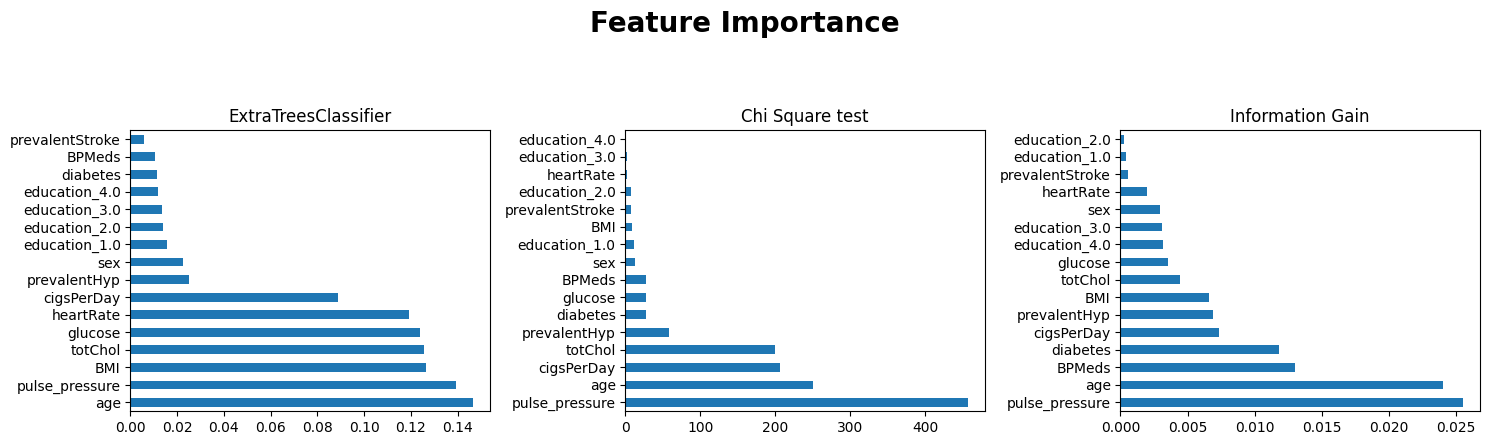

In [56]:
# plotting graph ---> Feature Importance
fig, axs = plt.subplots(1,3, figsize=(15,4))

ranked_features.sort_values(ascending=False).plot(kind='barh', title='ExtraTreesClassifier', ax=axs[0])
feature_imp.sort_values(ascending=False).plot(kind='barh', title='Chi Square test', ax=axs[1])
mutual_data.sort_values(ascending=False).plot(kind='barh', title='Information Gain', ax=axs[2])

plt.suptitle('Feature Importance', fontsize=20, fontweight='bold', y=1.1)
plt.tight_layout()

**From these graphs, we can say that the two most important features are 'age and 'pulse_pressure' to predict the target variable**

As we discussed earlier, in the healthcare industry, every piece of data is crucial for analyzing or forecasting the target variable. The entries in this dataset are person-specific, the values vary between individuals, and all of the features are very important.

That is why I am using all features, except multi-collinear features, to train the model.

<Axes: >

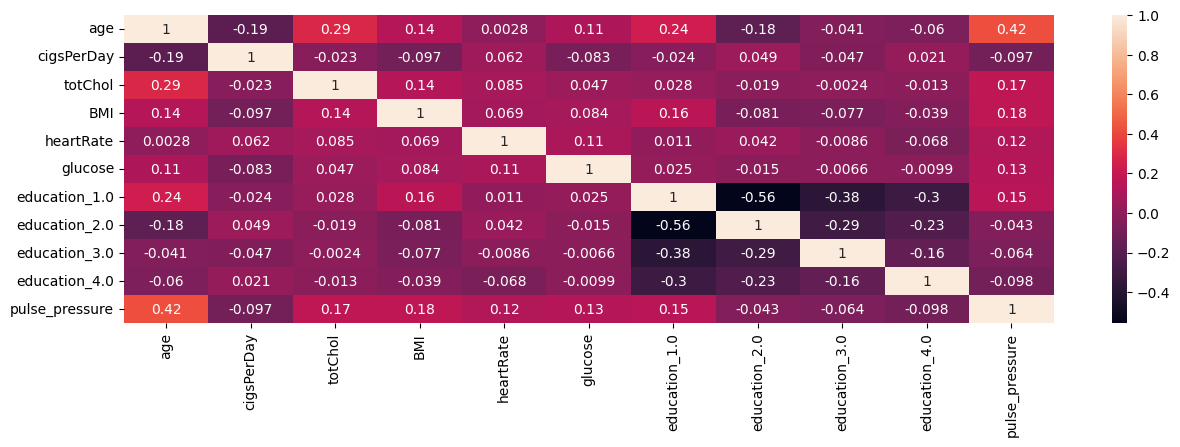

In [57]:
# plotting correlation heatmap to check multicollinearity.
plt.figure(figsize=(15,4))
sns.heatmap(risk_df.drop(columns='TenYearCHD').corr(),annot=True)

In [58]:
correlation(risk_df, 0.7)         # 0.7 is the thresold value for multicollinearity

set()

Within the independent variables, there is no high multicollinearity.

### **6.7 Dependent and Independent Variable Assignment**

In [59]:
# copying the data to save the work done till now
model_df = risk_df.copy()
model_df.head(3)

,age,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,education_1.0,education_2.0,education_3.0,education_4.0,pulse_pressure
id,,,,,,,,,,,,,,,,,
1,36,1,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,0,0,0,1,70.0
2,46,0,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,1,0,0,0,45.0
3,50,1,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,1,1,0,0,0,70.0


In [60]:
X = model_df.drop(columns='TenYearCHD')     # independent features
y = model_df['TenYearCHD']                  # dependent features

### **6.8 Handling Imbalance Target Variable**

Checking if data is balanced or not

0    2714
1     475
Name: TenYearCHD, dtype: int64
 


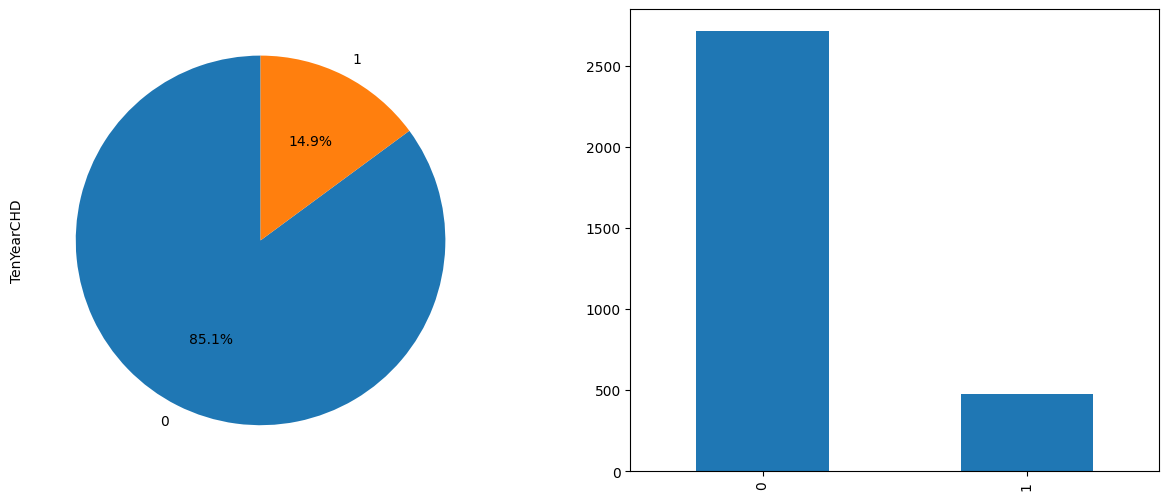

In [61]:
# Dependant Column Value Counts
print(model_df.TenYearCHD.value_counts())
print(" ")

# Dependant Variable Column Visualization
fig,ax = plt.subplots(1,2, figsize=(15,6))

# pie chart for percentage
model_df['TenYearCHD'].value_counts().plot(kind='pie',autopct="%1.1f%%",startangle=90, ax=ax[0])

# bar chart for count
model_df['TenYearCHD'].value_counts().plot(kind='bar', ax=ax[1])
plt.show()

When there are significantly more instances of certain classes than others, the issue of class imbalance typically arises. Class imbalance in the target class is a problem for machine learning models because it can result in biased predictions. That is why we need to balance the target class.

**The data set differs significantly. Our data, therefore, lack balance. We will use the Synthetic Minority Oversampling Technique (SMOTE) to resolve this issue.**
* SMOTE (Synthetic Minority Oversampling Technique) works by randomly selecting a minority class point and calculating its k-nearest neighbors. Between the selected point and its neighbors, the synthetic points are added. Continue with the steps until the data is balanced.

In [62]:
## Handling target class imbalance using SMOTE
from collections import Counter
#from imblearn.over_sampling import SMOTE

print(f'Before Handling Imbalanced class {Counter(y)}')

# Resampling the minority class
#smote = SMOTE(random_state=42)
# fit predictor and target variable
#X, y = smote.fit_resample(X, y)

print(f'After Handling Imbalanced class {Counter(y)}')

Before Handling Imbalanced class Counter({0: 2714, 1: 475})
After Handling Imbalanced class Counter({0: 2714, 1: 475})


We have successfully balanced the target variable

## **7. Model Building**

### **7.1 Train Test Split**

In [63]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(X_train.shape)
print(X_test.shape)

(2551, 16)
(638, 16)


### **7.2 Scaling Data**

In [64]:
# Scaling Data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### **Evaluation Metrics Used -**
* <b>Accuracy:</b> Simply put, accuracy is the percentage of times that the classifier correctly predicts. The ratio of the total number of predictions to the number of correct predictions is how accuracy is defined. If a model has a 99 percent accuracy rate, you might think it is doing very well. However, this is not always the case and can be misleading in some situations.
When the target class is well-balanced, accuracy is useful, but it is not a good choice for unbalanced classes.

* <b>Confusion Matrix:</b> The Confusion Matrix is a performance measurement for classification problems in machine learning in which there can be two or more classes output. It is a table with actual and predicted value combinations. The table that is frequently used to describe the performance of a classification model on a set of test data for which the true values are known is referred to as a confusion matrix. It is extremely helpful for determining the AUC-ROC curves, precision, recall, and accuracy.

* <b>Precision:</b> Precision explains the percentage of correctly predicted cases that were actually successful. When False Positives are more of a concern than False Negatives, precision can be useful.
A label's precision is calculated by dividing the number of predicted positives by the number of true positives.

* <b>Recall:</b> Recall describes the proportion of actual positive cases that our model correctly predicted. When False Negative is more important than False Positive, this metric is helpful. In medical cases, it matters whether we raise a false alarm or not, but the actual positive cases should not go unnoticed. The number of true positives divided by the total number of actual positives is the definition of recall for a label.

* <b>F1 Score:</b> This score incorporates both Precision and Recall metrics. When Precision and Recall are equal, it reaches its peak.
The harmonic mean of recall and precision is the F1 Score.

* <b>AUC-ROC:</b> The Receiver Operator Characteristic (ROC) is a probability curve that separates the "signal" from the "noise" by plotting the TPR (True Positive Rate) against the FPR (False Positive Rate) at various threshold values. The measure of a classifier's ability to differentiate between classes is the Area Under the Curve (AUC). This simply indicates that the classifier is able to precisely differentiate between all Positive and Negative class points when AUC is equal to 1. The classifier would correctly identify all negatives as positives when the AUC was zero.

### **7.3 Model Training**

In [65]:
# empty list for appending performance metric score
model_result = []

def predict(ml_model, model_name):

  '''
  Pass the model and predict value.
  Function will calculate all the eveluation metrics and appending those metrics score on model_result table.
  Plotting confusion_matrix and roc_curve for test data.
  '''

  # model fitting
  model = ml_model.fit(X_train, y_train)

  # predicting value and probability
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  y_train_prob = model.predict_proba(X_train)[:,1]
  y_test_prob = model.predict_proba(X_test)[:,1]


  ''' Performance Metrics '''
  # accuracy score  ---->  (TP+TN)/(TP+FP+TN+FN)
  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  print(f'train accuracy : {round(train_accuracy,3)}')
  print(f'test accuracy : {round(test_accuracy,3)}')

  # precision score  ---->  TP/(TP+FP)
  train_precision = precision_score(y_train, y_train_pred)
  test_precision = precision_score(y_test, y_test_pred)
  print(f'train precision : {round(train_precision,3)}')
  print(f'test precision : {round(test_precision,3)}')

  # recall score  ---->  TP/(TP+FN)
  train_recall = recall_score(y_train, y_train_pred)
  test_recall = recall_score(y_test, y_test_pred)
  print(f'train recall : {round(train_recall,3)}')
  print(f'test recall : {round(test_recall,3)}')

  # f1 score  ---->  Harmonic Mean of Precision and Recall
  train_f1 = f1_score(y_train, y_train_pred)
  test_f1 = f1_score(y_test, y_test_pred)
  print(f'train f1 : {round(train_f1,3)}')
  print(f'test f1 : {round(test_f1,3)}')

  # roc_auc score  ---->  It shows how well the model can differentiate between classes.
  train_roc_auc = roc_auc_score(y_train, y_train_prob)
  test_roc_auc = roc_auc_score(y_test, y_test_prob)
  print(f'train roc_auc : {round(train_roc_auc,3)}')
  print(f'test roc_auc : {round(test_roc_auc,3)}')
  print('-'*80)

  # classification report
  print(f'classification report for test data \n{classification_report(y_test, y_test_pred)}')
  print('-'*80)


  ''' plotting Confusion Matrix '''
  ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
  plt.title('confusion matrix on Test data', weight='bold')
  plt.show()
  print('-'*80)


  ''' plotting ROC curve '''
  fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
  plt.plot(fpr,tpr, label=f'ROC - {model_name}')
  plt.plot([0,1], [0,1], '--')
  plt.title('ROC curve on Test data', weight='bold')
  plt.xlabel('False Positive Rate----->')
  plt.ylabel('True Positive Rate----->')
  plt.legend(loc=4)


  ''' actual value vs predicted value on test data'''
  d = {'y_actual':y_test, 'y_predict':y_test_pred}
  print(pd.DataFrame(data=d).head(10).T)                   # constructing a dataframe with both actual and predicted values
  print('-'*80)


  # using the score from the performance metrics to create the final model_result.
  model_result.append({'model':model_name,
                       'train_accuracy':train_accuracy,
                       'test_accuracy':test_accuracy,
                       'train_precision':train_precision,
                       'test_precision':test_precision,
                       'train_recall':train_recall,
                       'test_recall':test_recall,
                       'train_f1':train_f1,
                       'test_f1':test_f1,
                       'train_roc_auc':train_roc_auc,
                       'test_roc_auc':test_roc_auc})

## **8. Model Implementation**

### **8.1 Logistic Regression**

Logistic regression is one of the simplest algorithms for estimating the relationship between independent variables and a single dependent binary variable and determining the likelihood of an event occurring.

The regulation parameter C controls the trade-off between keeping the model simple (underfitting) and increasing its complexity (overfitting). With increasing values of C, the model becomes more complicated and the power of regulation decreases, resulting in an overfitting of the data.

train accuracy : 0.857
test accuracy : 0.861
train precision : 0.848
test precision : 0.4
train recall : 0.072
test recall : 0.023
train f1 : 0.133
test f1 : 0.043
train roc_auc : 0.728
test roc_auc : 0.721
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       550
           1       0.40      0.02      0.04        88

    accuracy                           0.86       638
   macro avg       0.63      0.51      0.48       638
weighted avg       0.80      0.86      0.80       638

--------------------------------------------------------------------------------


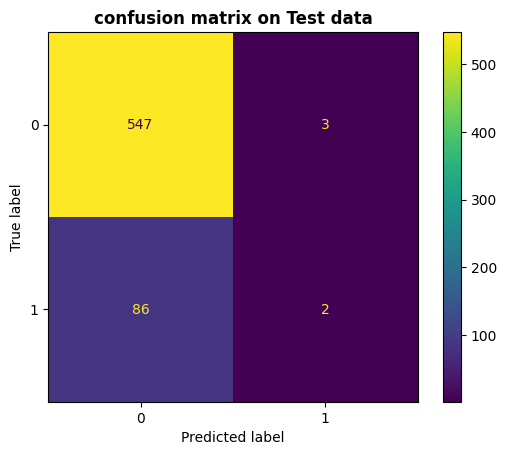

--------------------------------------------------------------------------------
id         2203  2070  2235  2922  2694  875   338   3372  2383  361 
y_actual      0     0     0     0     0     1     0     0     0     0
y_predict     0     0     0     0     0     1     0     0     0     0
--------------------------------------------------------------------------------


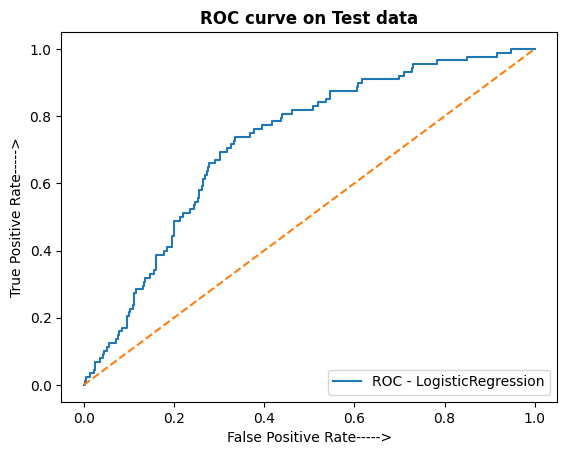

In [66]:
predict(LogisticRegression(), 'LogisticRegression')

### **8.2 SVM (Support Vector Machine)**

Classification is carried out by a Support Vector Machine (SVM) by locating the hyperplane with the greatest margin between the two classes. The support vectors are the vectors (cases) that define the hyperplane. Finding a hyperplane in an N-dimensional space that clearly classifies the data points is the goal of the SVM algorithm.

The number of features determines the hyperplane's dimension. The hyperplane is just a line if there are two input features. The hyperplane transforms into a two-dimensional plane when there are three input features. When the number of features is greater than three, it becomes difficult to imagine.

train accuracy : 0.858
test accuracy : 0.861
train precision : 0.963
test precision : 0.333
train recall : 0.067
test recall : 0.011
train f1 : 0.126
test f1 : 0.022
train roc_auc : 0.851
test roc_auc : 0.594
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       550
           1       0.33      0.01      0.02        88

    accuracy                           0.86       638
   macro avg       0.60      0.50      0.47       638
weighted avg       0.79      0.86      0.80       638

--------------------------------------------------------------------------------


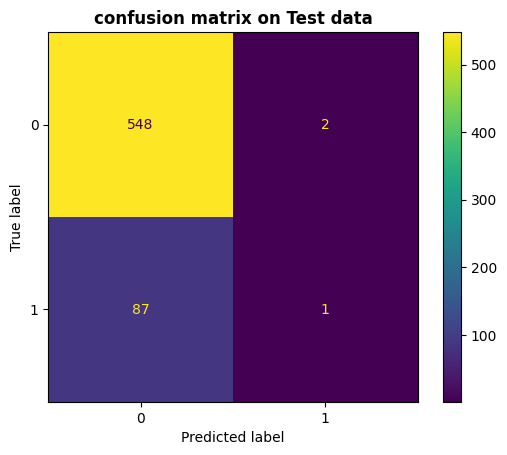

--------------------------------------------------------------------------------
id         2203  2070  2235  2922  2694  875   338   3372  2383  361 
y_actual      0     0     0     0     0     1     0     0     0     0
y_predict     0     0     0     0     0     0     0     0     0     0
--------------------------------------------------------------------------------


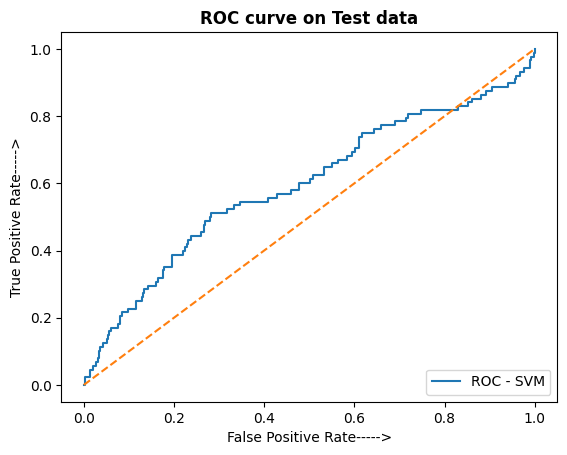

In [67]:
predict(SVC(probability=True), 'SVM')

### **8.3 KNN (K-Nearest Neighbours)**

A supervised machine learning algorithm known as KNN or K-nearest neighbor can be used to solve classification and regression problems. K is not a non-parametric nearest neighbor, i.e. It makes no assumptions regarding the assumptions that underlie the data. An input or unseen data set is categorized here by the algorithm based on the characteristics shared by the closest data points. The distance between two points determines these closest neighbors. The distance metric methods that are utilized can be Euclidean Distance, Manhattan Distance, Minkowski, Cosine Similarity Measure etc)

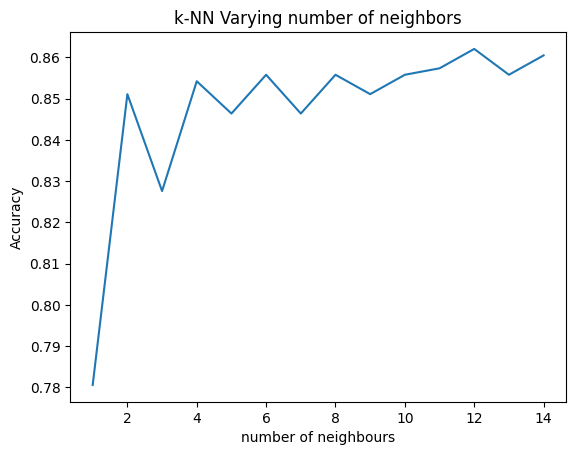

In [68]:
# Checking the optimum value of the k:
accuracy=[]

# Iteratig for the optimum values of k
for i in range(1,15):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  accuracy.append(knn.score(X_test, y_test))

#plotting the k-value vs accuracy
plt.title('k-NN Varying number of neighbors')
plt.plot(range(1,15), accuracy)
plt.xlabel('number of neighbours')
plt.ylabel('Accuracy')
plt.show()

The best accuracy is at K=1. So we will concentrate on low values of k; k=3 is superior to k=2. For binary classification, k is typically an odd number (to prevent ties) of at least three.

train accuracy : 1.0
test accuracy : 0.781
train precision : 1.0
test precision : 0.211
train recall : 1.0
test recall : 0.216
train f1 : 1.0
test f1 : 0.213
train roc_auc : 1.0
test roc_auc : 0.543
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       550
           1       0.21      0.22      0.21        88

    accuracy                           0.78       638
   macro avg       0.54      0.54      0.54       638
weighted avg       0.78      0.78      0.78       638

--------------------------------------------------------------------------------


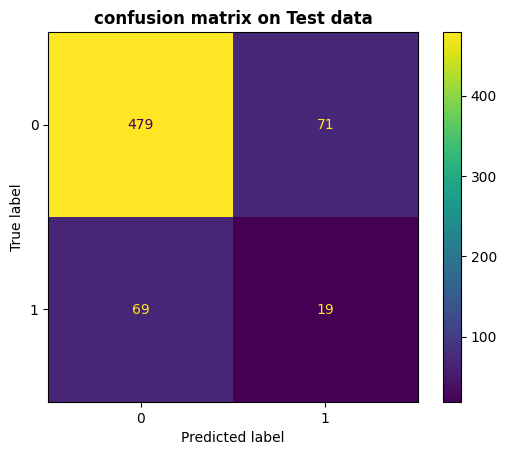

--------------------------------------------------------------------------------
id         2203  2070  2235  2922  2694  875   338   3372  2383  361 
y_actual      0     0     0     0     0     1     0     0     0     0
y_predict     0     0     0     0     0     0     0     0     0     0
--------------------------------------------------------------------------------


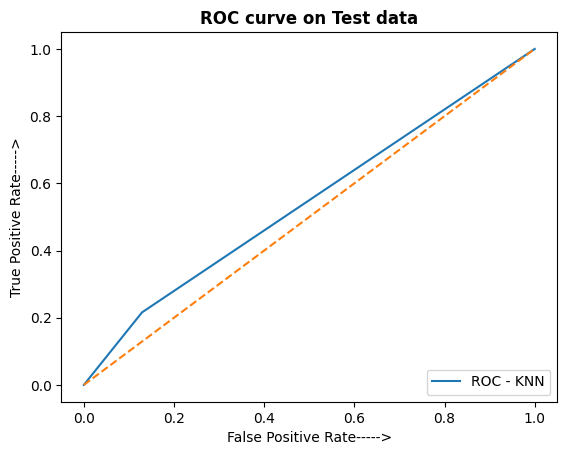

In [69]:
predict(KNeighborsClassifier(n_neighbors=1), 'KNN')

### **8.4 Decision Tree**

A decision tree is a tree-like model used in machine learning to make predictions or decisions by breaking down a set of rules or conditions into smaller and smaller sub-conditions, based on the values of the input features.

Each node in the tree represents a test on a feature, and each branch represents the outcome of the test. The final branches of the tree, called the leaves, represent the class predictions or decisions. The tree is built recursively by finding the best feature to split the data based on the information gain or decrease in impurity at each node.

train accuracy : 1.0
test accuracy : 0.757
train precision : 1.0
test precision : 0.218
train recall : 1.0
test recall : 0.295
train f1 : 1.0
test f1 : 0.251
train roc_auc : 1.0
test roc_auc : 0.563
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       550
           1       0.22      0.30      0.25        88

    accuracy                           0.76       638
   macro avg       0.55      0.56      0.55       638
weighted avg       0.79      0.76      0.77       638

--------------------------------------------------------------------------------


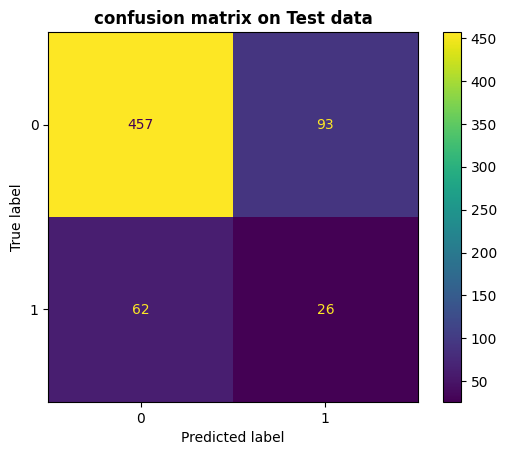

--------------------------------------------------------------------------------
id         2203  2070  2235  2922  2694  875   338   3372  2383  361 
y_actual      0     0     0     0     0     1     0     0     0     0
y_predict     0     0     0     0     1     1     0     0     0     1
--------------------------------------------------------------------------------


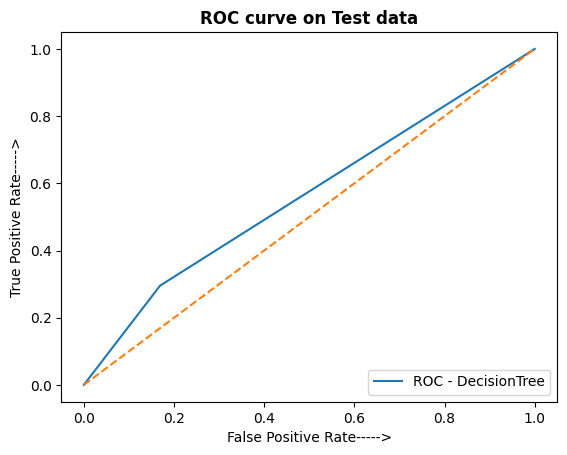

In [70]:
predict(DecisionTreeClassifier(), 'DecisionTree')

### **8.5 Random Forest**

Random Forest is an ensemble machine learning algorithm that builds multiple decision trees and combines their predictions to make a final classification or regression prediction. In contrast to a single decision tree, Random Forest reduces the risk of overfitting by combining the results of many trees, each built on a different subset of the data.

**Hyperparameter Tunning using RandomizedSearchCV**

In [79]:
rf_params = {'n_estimators': [500,600,800],     # number of trees in the ensemble
             'max_features': ["log2", "sqrt"],  # maximum number of features considered when splitting a node.
             'max_depth': [35,40,45,50],        # maximum number of levels allowed in each tree.
             'min_samples_split': [7,9,12],     # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [4,7,10]}      # minimum number of samples which can be stored in a tree leaf.



# performing Hyperparameter Tunning using RandomizedSearchCV
rf = RandomForestClassifier()
rf_randomsearch = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=15, cv=5, verbose=2, n_jobs=-1)

# model fitting
rf_randomsearch.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'max_depth': [35, 40, 45, 50],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [4, 7, 10],
                                        'min_samples_split': [7, 9, 12],
                                        'n_estimators': [500, 600, 800]},
                   verbose=2)

In [81]:
optimal_model = rf_randomsearch.best_estimator_
optimal_model

RandomForestClassifier(max_depth=40, max_features='log2', min_samples_leaf=10,
                       min_samples_split=12, n_estimators=800)

train accuracy : 0.855
test accuracy : 0.861
train precision : 1.0
test precision : 0.0
train recall : 0.044
test recall : 0.0
train f1 : 0.084
test f1 : 0.0
train roc_auc : 0.919
test roc_auc : 0.711
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       550
           1       0.00      0.00      0.00        88

    accuracy                           0.86       638
   macro avg       0.43      0.50      0.46       638
weighted avg       0.74      0.86      0.80       638

--------------------------------------------------------------------------------


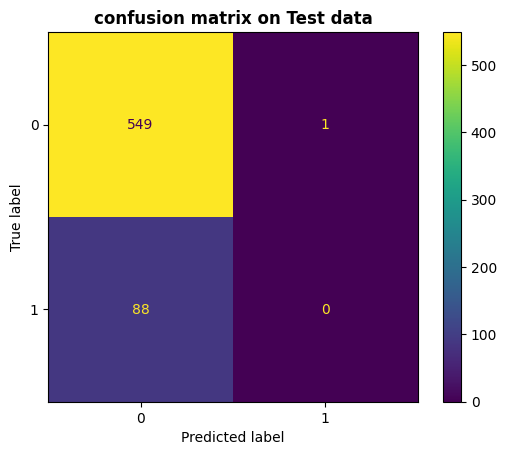

--------------------------------------------------------------------------------
id         2203  2070  2235  2922  2694  875   338   3372  2383  361 
y_actual      0     0     0     0     0     1     0     0     0     0
y_predict     0     0     0     0     0     0     0     0     0     0
--------------------------------------------------------------------------------


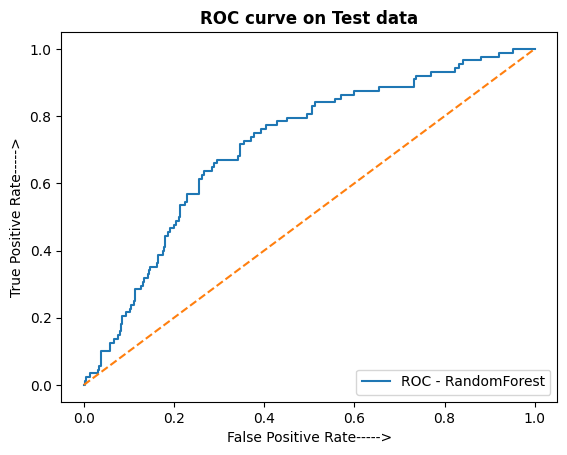

In [82]:
predict(optimal_model, 'RandomForest')

In [83]:
# importance feature
importances = optimal_model.feature_importances_

#Creating a dictonary
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

#Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

,Feature,Feature Importance
0,age,0.207232
15,pulse_pressure,0.161390
8,BMI,0.124775
10,glucose,0.121497
7,totChol,0.117882
9,heartRate,0.077740
2,cigsPerDay,0.066807
5,prevalentHyp,0.038424
1,sex,0.036497
11,education_1.0,0.015315


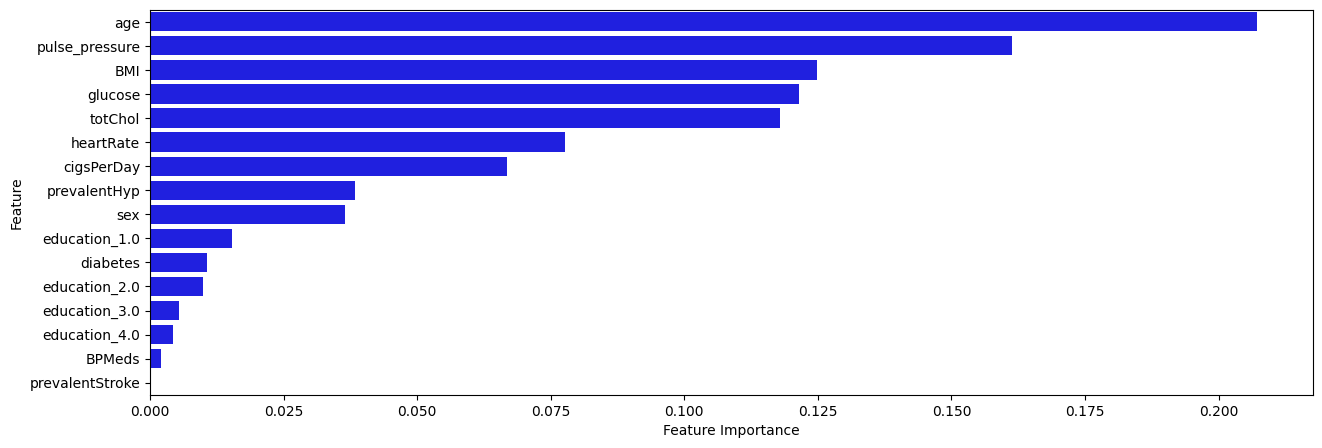

In [84]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
plt.show()

### **8.6 AdaBoost**

AdaBoost (Adaptive Boosting) is an ensemble machine learning algorithm that combines multiple weak models to form a stronger model. It works by assigning weights to the data points in a dataset and iteratively building weak models that try to correctly classify or predict the target variable. After each iteration, the weights of the misclassified or mispredicted data points are increased, making it more likely that the next weak model will focus on these points.

train accuracy : 0.858
test accuracy : 0.845
train precision : 0.697
test precision : 0.0
train recall : 0.119
test recall : 0.0
train f1 : 0.203
test f1 : 0.0
train roc_auc : 0.765
test roc_auc : 0.69
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       550
           1       0.00      0.00      0.00        88

    accuracy                           0.84       638
   macro avg       0.43      0.49      0.46       638
weighted avg       0.74      0.84      0.79       638

--------------------------------------------------------------------------------


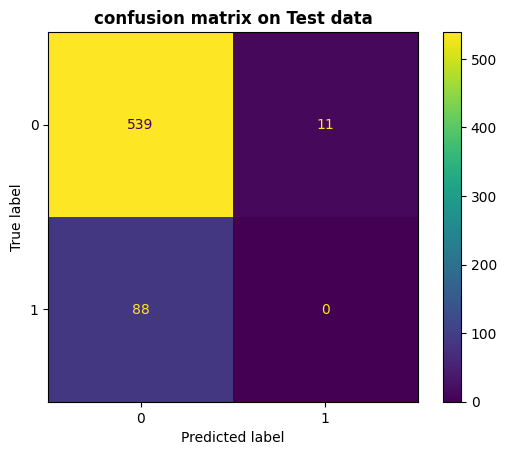

--------------------------------------------------------------------------------
id         2203  2070  2235  2922  2694  875   338   3372  2383  361 
y_actual      0     0     0     0     0     1     0     0     0     0
y_predict     0     0     0     0     0     0     0     0     0     0
--------------------------------------------------------------------------------


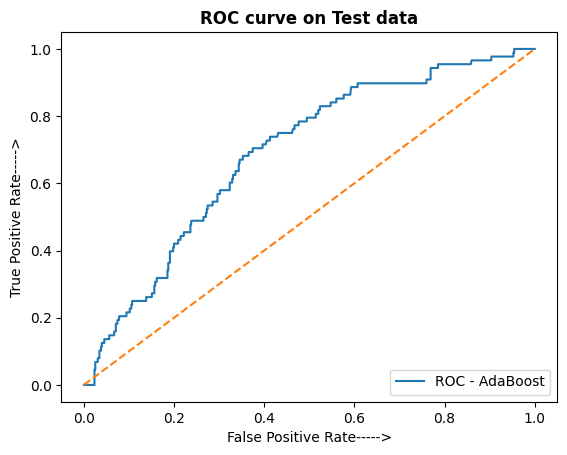

In [85]:
predict(AdaBoostClassifier(), 'AdaBoost')

### **8.7 XGBoost**

XGBoost (eXtreme Gradient Boosting) is an optimized implementation of the Gradient Boosting algorithm that is specifically designed for large-scale and complex data. XGBoost is an ensemble learning algorithm that builds multiple decision trees and combines their predictions to make a final prediction.

**HyperParameter Tunning using GridSearchCV**

In [86]:
xgb_params = {'n_estimators': [1000],    # number of trees in the ensemble
          'max_depth': [6,9],            # maximum number of levels allowed in each tree.
          'min_samples_split': [5,7],    # minimum number of samples necessary in a node to cause node splitting.
          'min_samples_leaf': [6,8],     # minimum number of samples which can be stored in a tree leaf.
          'learning_rate':[0.1]}         # optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.


# performing Hyperparameter Tunning using GridSearchCV
xgb = XGBClassifier()
xgb_gridsearch = GridSearchCV(estimator=xgb, param_grid=xgb_params, cv=5, n_jobs=-1, verbose=2)

# model fitting
xgb_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[07:14:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [6, 9],
                         'min_samples_leaf': [6, 8],
                         'min_samples_split': [5, 7], 'n_estimators': [1000]},
             verbose=2)

In [87]:
optimal_model = xgb_gridsearch.best_estimator_
optimal_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, min_samples_leaf=6, min_samples_split=5,
              missing=nan, monotone_constraints=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

[07:15:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

train accuracy : 1.0
test accuracy : 0.835
train precision : 1.0
test precision : 0.242
train recall : 1.0
test recall : 0.091
train f1 : 1.0
test f1 : 0.132
train roc_auc : 1.0
test roc_auc : 0.639
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       550
           1       0.24      0.09      0.13        88

    accuracy                           0.84       638
   macro avg       0.56      0.52      0.52       638
weighted avg       0.78      0.84      0.80       638

--------------------------------------------------------------------------------


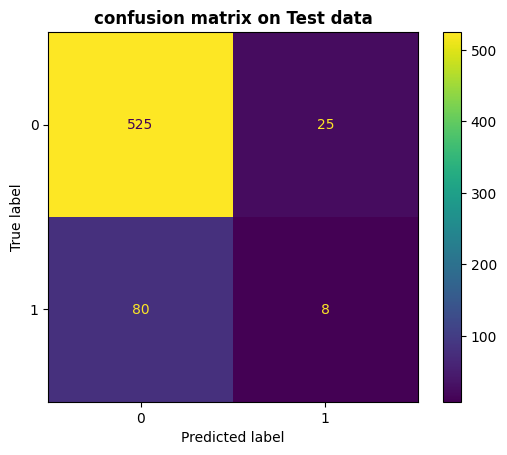

--------------------------------------------------------------------------------
id         2203  2070  2235  2922  2694  875   338   3372  2383  361 
y_actual      0     0     0     0     0     1     0     0     0     0
y_predict     0     0     0     0     1     1     0     0     0     0
--------------------------------------------------------------------------------


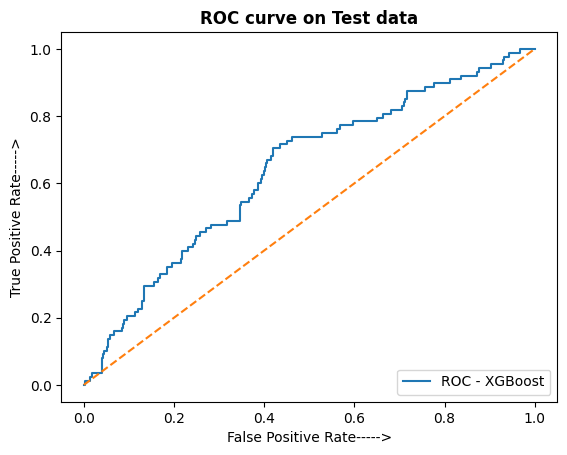

In [88]:
predict(optimal_model, 'XGBoost')

In [89]:
# importance feature
importances = optimal_model.feature_importances_

#Creating a dictonary in order to form the dataframe
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

#Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

,Feature,Feature Importance
4,prevalentStroke,0.181802
14,education_4.0,0.103887
0,age,0.070180
13,education_3.0,0.058820
1,sex,0.057361
15,pulse_pressure,0.052796
10,glucose,0.052039
5,prevalentHyp,0.051695
6,diabetes,0.051168
7,totChol,0.049992


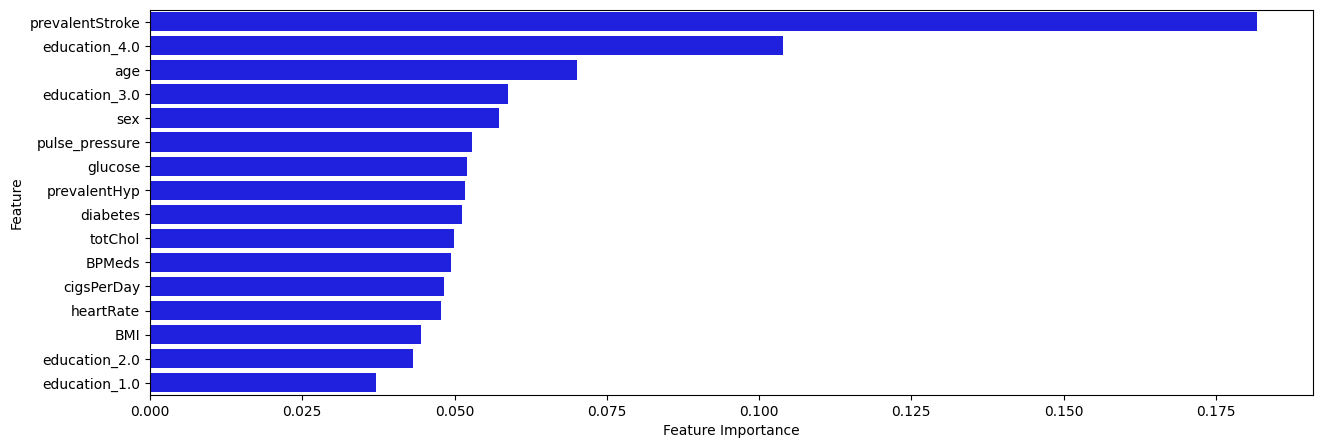

In [90]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
plt.show()

### **8.8 Light Gradient Boosting**

LightGBM is a gradient boosting framework that uses tree-based learning algorithms. It is designed to be more efficient than traditional gradient boosting algorithms and is particularly well-suited for large datasets.LightGBM is an open-source library that was developed by Microsoft.

One of the key features of LightGBM is its use of a histogram-based approach to split nodes in decision trees.

**HyperParameter Tunning using GridSearchCV**

In [91]:
lgb_params = {'n_estimators': [1000],   # number of trees in the ensemble
          'max_depth': [7,9],           # maximum number of levels allowed in each tree.
          'min_samples_split': [4,5],   # minimum number of samples necessary in a node to cause node splitting.
          'min_samples_leaf': [4,6],    # minimum number of samples which can be stored in a tree leaf.
          'learning_rate':[0.1]}        # optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.


# performing Hyperparameter Tunning using GridSearchCV
lgb = LGBMClassifier(objective='binary')
lgb_gridsearch = GridSearchCV(estimator=lgb, param_grid=lgb_params, cv=5, verbose=2, n_jobs=-1)
lgb_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 387, number of negative: 2164
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you ca

GridSearchCV(cv=5, estimator=LGBMClassifier(objective='binary'), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [7, 9],
                         'min_samples_leaf': [4, 6],
                         'min_samples_split': [4, 5], 'n_estimators': [1000]},
             verbose=2)

In [92]:
optimal_model = lgb_gridsearch.best_estimator_
optimal_model

LGBMClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=4,
               n_estimators=1000, objective='binary')

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 387, number of negative: 2164
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 76

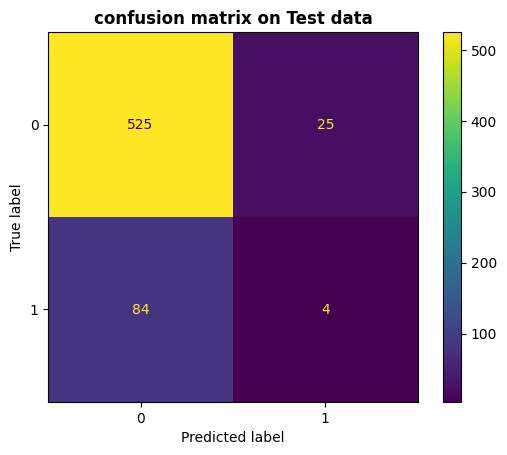

--------------------------------------------------------------------------------
id         2203  2070  2235  2922  2694  875   338   3372  2383  361 
y_actual      0     0     0     0     0     1     0     0     0     0
y_predict     0     0     0     0     1     1     0     0     0     0
--------------------------------------------------------------------------------


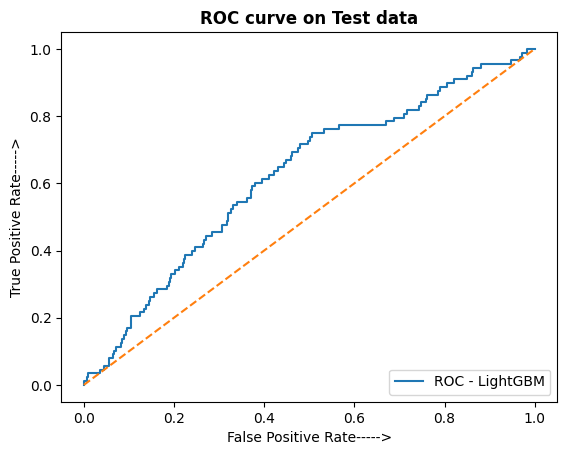

In [93]:
predict(optimal_model, 'LightGBM')

In [94]:
# importance feature
importances = optimal_model.feature_importances_

#Creating a dictonary in order to form the dataframe
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

#Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

,Feature,Feature Importance
8,BMI,5427
7,totChol,4928
15,pulse_pressure,4778
10,glucose,3668
0,age,3512
9,heartRate,3385
2,cigsPerDay,1469
1,sex,488
11,education_1.0,405
5,prevalentHyp,393


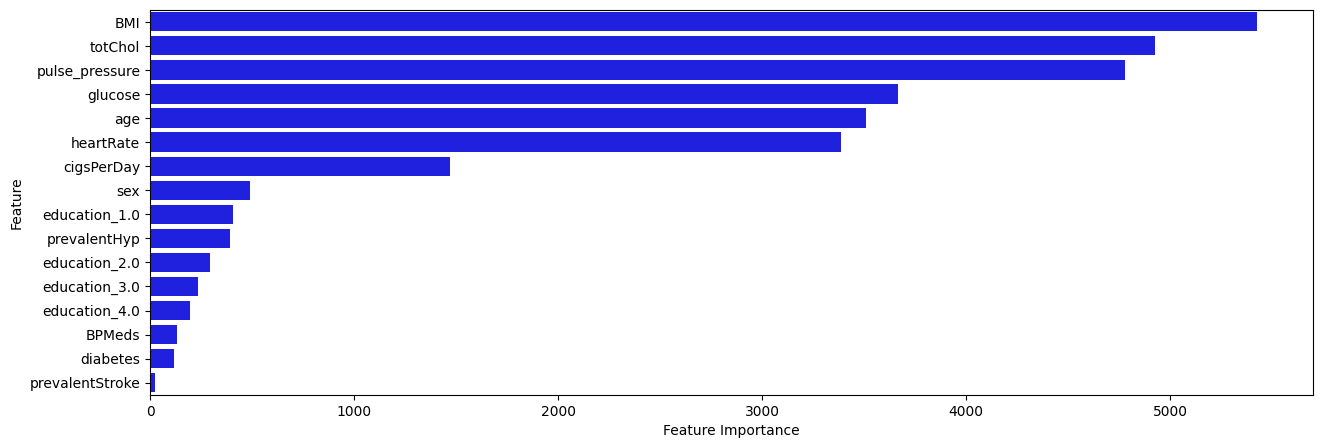

In [95]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
plt.show()

### **8.9 Model Result**

In [96]:
model_result = pd.DataFrame(model_result)
round(model_result,3)

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,train_roc_auc,test_roc_auc
0,LogisticRegression,0.857,0.861,0.848,0.400,0.072,0.023,0.133,0.043,0.728,0.721
1,SVM,0.858,0.861,0.963,0.333,0.067,0.011,0.126,0.022,0.851,0.594
2,KNN,1.000,0.781,1.000,0.211,1.000,0.216,1.000,0.213,1.000,0.543
3,DecisionTree,1.000,0.757,1.000,0.218,1.000,0.295,1.000,0.251,1.000,0.563
4,RandomForest,0.855,0.861,1.000,0.000,0.044,0.000,0.084,0.000,0.919,0.711
5,AdaBoost,0.858,0.845,0.697,0.000,0.119,0.000,0.203,0.000,0.765,0.690
6,XGBoost,1.000,0.835,1.000,0.242,1.000,0.091,1.000,0.132,1.000,0.639
7,LightGBM,1.000,0.829,1.000,0.138,1.000,0.045,1.000,0.068,1.000,0.621


The majority and minority of the count in our dataset come from the negative and positive, respectively. Accuracy scores aren't very helpful when dealing with imbalanced data or classes.

It is acceptable to classify a healthy individual as having a 10-year risk of coronary heart disease CHD (false positive) and to conduct additional medical tests; however, it is categorically unacceptable to fail to identify a particular patient or to classify a particular patient as healthy (false negative). As a result, **the model's recall score will be the primary focus of our project.**

Balanced accuracy is a better metric than F1 when positives and negatives are equally important. When more attention is required, **F1 is an excellent scoring metric for imbalanced data.**

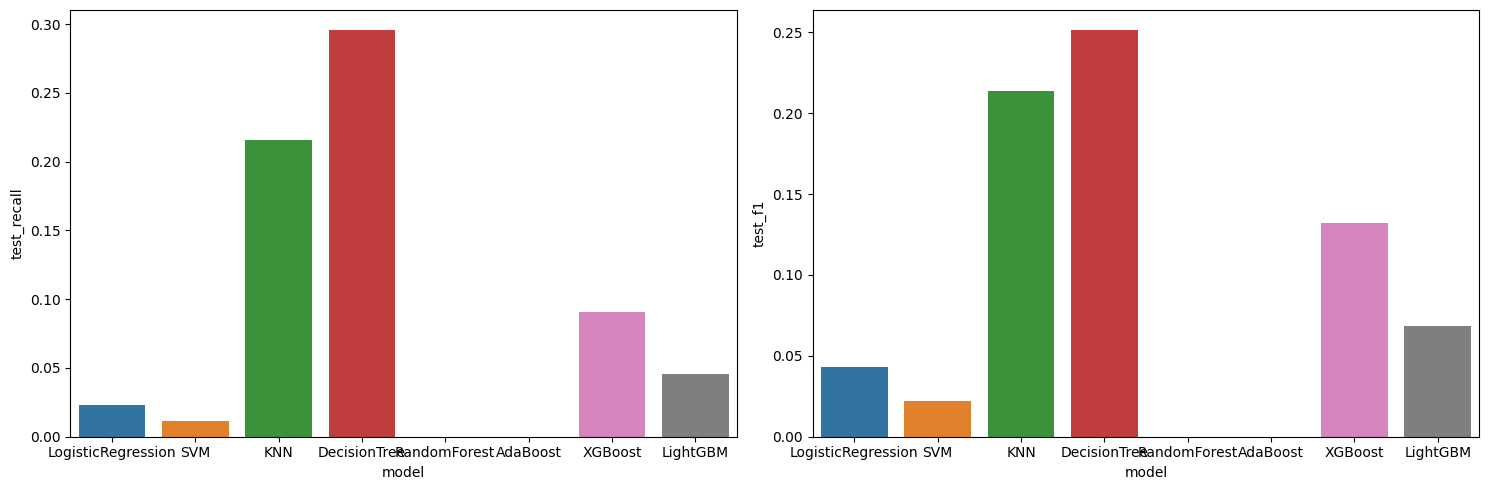

In [97]:
# plotting graph to compaire model performance of all the models
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x=model_result['model'], y=model_result['test_recall'], ax=axs[0])   # Model vs Recall score
sns.barplot(x=model_result['model'], y=model_result['test_f1'], ax=axs[1])       # Model vs F1 score
plt.tight_layout()

**We didn't want to mispredict a person's safety when he has the risk of 10 years of CHD, so the final model we chose was KNN.**

## **9. Conclusion**

In the context of this endeavor, our focus revolved around a classification task demanding the categorization and anticipation of the 10-year likelihood of forthcoming coronary heart disease (CHD) among patients. The primary objective of this initiative was to craft a resource that facilitates the timely identification and mitigation of CHD, thereby confronting a notable issue in public health. This was achieved through the adept utilization of techniques within the realm of machine learning.

* There were approximately **3390 records and 16 attributes** in the dataset.
* We started by importing the dataset, and necessary libraries and conducted exploratory data analysis (EDA) to get a clear insight into each feature by separating the dataset into numeric and categoric features. We did Univariate, Bivariate, and even multivariate analyses.
* After that, the outliers and null values were removed from the raw data and treated. Data were transformed to ensure that it was compatible with machine learning models.
* In feature engineering, we transformed the raw data into a more useful and informative form, by creating new features, encoding, and understanding important features. We handled target class imbalance using **SMOTE**.
* Then finally cleaned and scaled data was sent to various models, the metrics were made to evaluate the model, and we tuned the hyperparameters to make sure the right parameters were being passed to the model. To select the final model based on requirements, we checked model_result.
* When developing a machine learning model, it is generally recommended to track multiple metrics because each one highlights distinct aspects of model performance. We are, however, **focusing more on the Recall score and F1 score** because we are dealing with healthcare data and our data is unbalanced.
* With an **f1-score of 0.907 and a recall score of 0.863** on test data, we have noticed that **LightGBM** Classifier outperforms all other models. It is safe to say that the LightGBM Classifier is the best option for our issue if the f1-score is to be considered.
* Our **highest recall score, 0.938%, came from KNN**.
* The **XGBoost and RandomForestClassifier tree-based algorithms also provided the best approach** to achieving our goal. We were successful in achieving a respective f1-score of 0.904 and 0.893.

The recall score is of the utmost significance in the medical field, where we place a greater emphasis on reducing false negative values because we do not want to mispredict a person's safety when he is at risk. With recall scores of 0.938, 0.870, and 0.863, respectively, KNN, XGB, and LGBM performed the best.

**Last but not least, we can select the Final model as our KNN classifier due to its highest recall score. It is acceptable to classify a healthy individual as having a 10-year risk of coronary heart disease CHD (false positive) and to follow up with additional medical tests; however, it is categorically unacceptable to miss identifying a particular patient or to classify a particular patient as healthy (false negative).**